# **Looking for a non-trivial commutator of order 5**

In [this work](https://www.mdpi.com/2075-1680/13/4/274), the authors studied the spectral curve for a non-trivial commutator of operators of order 3. Here, intending to develop a similar theory for order 5 (or generically for order prime $p$), we will look for a non-trivial example of order 5 with a commutator.

More precisely, let $U = \{u_2,\ldots, u_5\}$ be a set of differential values with weights $2,3,4,5$ respectively, and consider the differential operator
$$L_5 = L = \partial^5 + u_2\partial^3 + u_3 \partial^2 + u_4\partial + u_5.$$
We would like to find a set of functions $z_2(x),\ldots,z_5(x)$ such that we can find a non-trivial commutator for the specialized operator $L_5(Z) = L_5(u=z)$.

In [1]:
import sys
sys.path.insert(0, "..") # dalgebra is here

from dalgebra import *
from dalgebra.commutators import *

import logging
from functools import lru_cache
import pickle
#%display latex

In [2]:
L_5 = generic_normal(5, "u"); L = L_5; z = L.parent().gen("z"); u = (0, 0) + L.parent().gens()[:-1]
L_5

u_2_0*z_3 + u_3_0*z_2 + u_4_0*z_1 + u_5_0*z_0 + z_5

## Some ideas

### **The almost commuting basis**

In [this paper](https://arxiv.org/abs/2405.05421), the authors show a method to compute a basis of differential operators $W(L_n) = \{P_m(U) : m \in \mathbb{N}\}$ such that all operators $P_m(U)$ almost commute with $L_n$, i.e., the order of $[L_n, P_m]\leq n-2$ and such that $P_m(U)$ is homogeneous of weight $m$ when considering $\partial$ with weight 1.

In this notebook, we are focusing on $n=5$, hence the order for almost commutation is $3$. This means that in this example, we have for all $m\in \mathbb{N}$:
$$[L, P_m(U)] = H_{m,0}(U) + H_{m,1}(U)\partial + H_{m,2}(U)\partial^2 + H_{m,3}(U)\partial^3,$$
where $H_{m,i}(U)$ are differential polynomials in the differential variables $U$, homogeneous of weight $n+m-i$.

For any given value of $m$, the value for $P_m(U)$ and $H_{m,i}(U)$ can be computed using the method `almost_commuting_wilson`:

In [3]:
P, H = [z[0]], [[0,0,0,0]]
for i in range(1, 10):
    np, nh = almost_commuting_wilson(5,i)
    P.append(np)
    H.append(nh)

##### Some examples of the $P_m(U)$

In [4]:
P[1]

z_1

In [5]:
P[2]

2/5*u_2_0*z_0 + z_2

In [6]:
P[3]

3/5*u_2_0*z_1 - 3/5*u_2_1*z_0 + 3/5*u_3_0*z_0 + z_3

In [7]:
P[4]

4/5*u_2_0*z_2 - 2/25*u_2_0^2*z_0 - 2/5*u_2_1*z_1 + 4/5*u_3_0*z_1 - 2/5*u_3_1*z_0 + 4/5*u_4_0*z_0 + z_4

In [8]:
P[5]

u_2_0*z_3 + u_3_0*z_2 + u_4_0*z_1 + u_5_0*z_0 + z_5

### **The search for a non-trivial commutator**

As mentioned above, $W(L)$ is a $\mathbb{C}$-basis of all the almost commuting differential operators with the generic operator $L$. Let $\mathcal{W}(L)$ denote such space. Hence, for any operator $Q(U) \in \mathcal{W}(L)$, we have
$$[L, Q] = K_0(U) + K_1(U)\partial + K_2(U)\partial^2 + K_3(U)\partial^3.$$

We can be more precise. If $Q(U)$ has order $M$, then there is a linear combination of $P_m(U)$ for $m=0,\ldots,M$ leading to:
$$Q(U) = c_0 + c_1P_1(U) + \ldots + c_{M-1}P_{M-1}(U) + c_{M}P_M(U).$$

Due to the bilinear nature of $[\cdot,\cdot]$ it is easy to see that
$$K_i(U) = \sum_{m=0}^M c_m H_{m,i}(U).$$

Let us denote $H_m(U) = (H_{m,0}(U),H_{m,1}(U),H_{m,2}(U),H_{m,3}(U))^T$, and similarly with $K = (K_0(U), K_1(U), K_2(U), K_3(U))^T$ and $\mathbf{c} = (c_0,\ldots,c_M)^T$. Then, we can write the previous identity with:
$$K = (H_0 | H_1 | \ldots | H_M) \mathbf{c}.$$

It is *clear* from this point thet if we find a set of functions $Z=(z_2(x),z_3(x),z_4(x),z_5(x))$ and a list of constants $\mathbf{c}$ such that $K(Z) = 0$, then we would have found an operator $L(Z)$ or order 5 with a commutator $Q(Z)$.

In [9]:
_,_,K6 = GetEquationsForSolution(6, 5, extract=None)

##### The equations for the order 6 commutator

In [10]:
K6[0]

-(12/25*c_4)*u_2_0*u_2_1*u_2_2 - (7/5*c_6)*u_2_0*u_2_1*u_2_4 - (3/5*c_6)*u_2_0*u_2_1*u_3_3 - (4/25*c_4)*u_2_0*u_2_1*u_4_0 + (18/25*c_6)*u_2_0*u_2_1*u_4_2 + (3/25*c_6)*u_2_0*u_2_1*u_5_1 - (24/125*c_6)*u_2_0*u_2_1^2*u_3_0 - (24/125*c_6)*u_2_0*u_2_1^3 - (66/25*c_6)*u_2_0*u_2_2*u_2_3 - (4/25*c_4)*u_2_0*u_2_2*u_3_0 - (27/25*c_6)*u_2_0*u_2_2*u_3_2 + (18/25*c_6)*u_2_0*u_2_2*u_4_1 + (2/5*c_2)*u_2_0*u_2_3 - (21/25*c_6)*u_2_0*u_2_3*u_3_1 + (3/25*c_6)*u_2_0*u_2_3*u_4_0 - (3/5*c_3)*u_2_0*u_2_4 - (9/25*c_6)*u_2_0*u_2_4*u_3_0 - (4/25*c_4)*u_2_0*u_2_5 - (4/25*c_6)*u_2_0*u_2_7 + (3/25*c_6)*u_2_0*u_3_0*u_3_3 + (6/25*c_6)*u_2_0*u_3_0*u_4_2 - (6/25*c_6)*u_2_0*u_3_0*u_5_1 + (18/25*c_6)*u_2_0*u_3_1*u_3_2 - (3/25*c_6)*u_2_0*u_3_2*u_4_0 + (3/5*c_3)*u_2_0*u_3_3 - (2/5*c_4)*u_2_0*u_3_4 - (8/25*c_6)*u_2_0*u_3_6 + (6/25*c_6)*u_2_0*u_4_0*u_4_1 + (4/5*c_4)*u_2_0*u_4_3 + (16/25*c_6)*u_2_0*u_4_5 - (3/5*c_3)*u_2_0*u_5_1 - (4/5*c_4)*u_2_0*u_5_2 - (3/5*c_6)*u_2_0*u_5_4 - (72/125*c_6)*u_2_0^2*u_2_1*u_2_2 - (12/125*c_6)*

In [11]:
K6[1]

-(132/25*c_6)*u_2_0*u_2_1*u_2_3 - (8/25*c_4)*u_2_0*u_2_1*u_3_0 - (18/25*c_6)*u_2_0*u_2_1*u_3_2 + (39/25*c_6)*u_2_0*u_2_1*u_4_1 - (12/25*c_4)*u_2_0*u_2_1^2 + (6/5*c_2)*u_2_0*u_2_2 - (27/25*c_6)*u_2_0*u_2_2*u_3_1 + (3/5*c_6)*u_2_0*u_2_2*u_4_0 - (96/25*c_6)*u_2_0*u_2_2^2 - (6/5*c_3)*u_2_0*u_2_3 - (21/25*c_6)*u_2_0*u_2_3*u_3_0 - (6/5*c_4)*u_2_0*u_2_4 - (26/25*c_6)*u_2_0*u_2_6 + (18/25*c_6)*u_2_0*u_3_0*u_3_2 + (6/25*c_6)*u_2_0*u_3_0*u_4_1 + (6/25*c_6)*u_2_0*u_3_1*u_4_0 + (18/25*c_6)*u_2_0*u_3_1^2 + (9/5*c_3)*u_2_0*u_3_2 - (2/5*c_4)*u_2_0*u_3_3 - (14/25*c_6)*u_2_0*u_3_5 - (3/5*c_3)*u_2_0*u_4_1 + (8/5*c_4)*u_2_0*u_4_2 + (9/5*c_6)*u_2_0*u_4_4 - (8/5*c_4)*u_2_0*u_5_1 - (9/5*c_6)*u_2_0*u_5_3 - (24/125*c_6)*u_2_0^2*u_2_1*u_3_0 - (72/125*c_6)*u_2_0^2*u_2_1^2 - (12/25*c_4)*u_2_0^2*u_2_2 - (24/25*c_6)*u_2_0^2*u_2_4 - (3/25*c_6)*u_2_0^2*u_3_3 + (3/5*c_6)*u_2_0^2*u_4_2 - (6/25*c_6)*u_2_0^2*u_5_1 - (36/125*c_6)*u_2_0^3*u_2_2 - (19/25*c_6)*u_2_1*u_2_2*u_3_0 - (16/5*c_4)*u_2_1*u_2_3 - (88/25*c_6)*u_2_1*u

In [12]:
K6[2]

(6/5*c_2)*u_2_0*u_2_1 - (168/25*c_6)*u_2_0*u_2_1*u_2_2 + (12/25*c_6)*u_2_0*u_2_1*u_3_1 + (24/25*c_6)*u_2_0*u_2_1*u_4_0 - (2*c_4)*u_2_0*u_2_3 - (47/25*c_6)*u_2_0*u_2_5 + (24/25*c_6)*u_2_0*u_3_0*u_3_1 + (6/5*c_3)*u_2_0*u_3_1 + (2/5*c_4)*u_2_0*u_3_2 + (4/5*c_4)*u_2_0*u_4_1 + (9/5*c_6)*u_2_0*u_4_3 - (9/5*c_6)*u_2_0*u_5_2 - (12/25*c_4)*u_2_0^2*u_2_1 - (36/25*c_6)*u_2_0^2*u_2_3 + (6/25*c_6)*u_2_0^2*u_3_2 + (12/25*c_6)*u_2_0^2*u_4_1 - (36/125*c_6)*u_2_0^3*u_2_1 - (24/5*c_4)*u_2_1*u_2_2 - (31/5*c_6)*u_2_1*u_2_4 + (6/5*c_3)*u_2_1*u_3_0 + (12/25*c_6)*u_2_1*u_3_0^2 + (2/5*c_4)*u_2_1*u_3_1 - (9/5*c_6)*u_2_1*u_3_3 + (4/5*c_4)*u_2_1*u_4_0 + (27/5*c_6)*u_2_1*u_4_2 - (9/5*c_6)*u_2_1*u_5_1 - (48/25*c_6)*u_2_1^3 - (54/5*c_6)*u_2_2*u_2_3 - (4*c_6)*u_2_2*u_3_2 + (32/5*c_6)*u_2_2*u_4_1 + (4*c_2)*u_2_3 - (17/5*c_6)*u_2_3*u_3_1 + (14/5*c_6)*u_2_3*u_4_0 - (3*c_3)*u_2_4 - (6/5*c_6)*u_2_4*u_3_0 - (6/5*c_4)*u_2_5 - c_6*u_2_7 + (4/5*c_4)*u_3_0*u_3_1 + (13/5*c_6)*u_3_0*u_3_3 - (6/5*c_6)*u_3_0*u_4_2 - (6/5*c_6)*u_3

In [13]:
K6[3]

(6/5*c_3)*u_2_0*u_2_1 + (24/25*c_6)*u_2_0*u_2_1*u_3_0 - (36/25*c_6)*u_2_0*u_2_1^2 - (6/5*c_4)*u_2_0*u_2_2 - (6/5*c_6)*u_2_0*u_2_4 + (4/5*c_4)*u_2_0*u_3_1 + (3/5*c_6)*u_2_0*u_3_3 + (3/5*c_6)*u_2_0*u_4_2 - (6/5*c_6)*u_2_0*u_5_1 - (18/25*c_6)*u_2_0^2*u_2_2 + (12/25*c_6)*u_2_0^2*u_3_1 - c_1*u_2_1 - (18/5*c_6)*u_2_1*u_2_3 + (4/5*c_4)*u_2_1*u_3_0 + (1/5*c_6)*u_2_1*u_3_2 + (12/5*c_6)*u_2_1*u_4_1 - (6/5*c_6)*u_2_1*u_5_0 - (6/5*c_4)*u_2_1^2 + (3*c_2)*u_2_2 - (1/5*c_6)*u_2_2*u_3_1 + (9/5*c_6)*u_2_2*u_4_0 - (12/5*c_6)*u_2_2^2 - c_3*u_2_3 + (1/5*c_6)*u_2_3*u_3_0 - c_4*u_2_4 - (4/5*c_6)*u_2_6 + (6/5*c_6)*u_3_0*u_3_2 - (6/5*c_6)*u_3_0*u_4_1 - (2*c_2)*u_3_1 - (6/5*c_6)*u_3_1*u_4_0 + (6/5*c_6)*u_3_1^2 + (3*c_3)*u_3_2 + (1/5*c_6)*u_3_5 - (3*c_3)*u_4_1 + (2*c_4)*u_4_2 + c_6*u_4_4 - (4*c_4)*u_5_1 - (2*c_6)*u_5_3

##### Coming back to argument

These differential systems are tremendously difficult to solve. A first remark: the constants for $m\equiv 0\ (mod\ 5)$ never appear. This is clear since the influence of $L^{(m/5)}$ is not relevant for the commutation of the obtained operator $Q(U)$. 

In [10]:
print(
    {
        g : 
        (
            tuple(el.order(g) for el in K6), 
            [
                [
                    el.degree(g[i]) for i in range(el.order(g)+1)
                ] for el in K6
            ]
        ) for g in K6[0].parent().remove_variables("z").gens()
    }
)

{u_2_*: ((9, 8, 7, 6), [[3, 3, 2, 1, 1, 1, 1, 1, 0, 1], [3, 2, 2, 2, 1, 1, 1, 0, 1], [3, 3, 1, 1, 1, 1, 0, 1], [2, 2, 2, 1, 1, 0, 1]]), u_3_*: ((8, 7, 6, 5), [[2, 2, 1, 1, 1, 1, 1, 0, 1], [2, 2, 2, 1, 1, 1, 0, 1], [2, 1, 1, 1, 1, 0, 1], [1, 2, 1, 1, 0, 1]]), u_4_*: ((7, 6, 5, 4), [[2, 1, 1, 1, 1, 1, 0, 1], [1, 2, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1]]), u_5_*: ((6, 5, 4, 3), [[1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1], [1, 1, 0, 1]])}


In [11]:
RR = K6[0].parent().remove_variables("z")
DS = DSystem([RR(el) for el in K6], variables=RR.gens()[1:])

In [12]:
eq = DS.equation(-1)
eq2 = DS.equation(-2)
U = eq.parent().gen("u_5")
rnk = RR.elimination_ranking()

In [14]:
red1 = eq.derivative().coefficient_full(U[eq.order(U)+1])*eq2 - eq.derivative()*eq2.coefficient_full(U[eq2.order(U)])

In [15]:
red2 = red1.derivative(times=2) * eq.coefficient_full(U[3]) - red1.derivative(times=2).coefficient_full(U[3]) * eq

In [16]:
red3 = red1.derivative() * red2.coefficient_full(U[2]) - red1.derivative().coefficient_full(U[2]) * red2

In [17]:
red4 = red1 * red3.coefficient_full(U[1]) - red1.coefficient_full(U[1]) * red3

In [18]:
rnk.leader(red4)

u_5_0

In [19]:
val_u_5 = (-red4.constant_coefficient(U),red4.coefficient_full(U[0]))

In [20]:
poly_u_5 = RR.as_polynomials(*val_u_5)

In [21]:
H = rnk.remainder(eq2, eq)

### **Exploring the differential system**

In [19]:
C = K6[0].parent().base().gens()
n = 5
R = DifferentialRing(QQ[x,*C], [1] + len(C)*[0]).fraction_field()
x = R.gens()[0]

##### Case with $u_2 = 0$, $u_3 = 0$, $u_4 = 0$ ## **It leads to u_5 being a constant**

In [31]:
rS = DSystem([el(u_2=0, u_3=0, u_4 = 0) for el in K6]); rS

System over [Ring of operator polynomials in (u_5, z) over Differential Ring [[Multivariate Polynomial Ring in c_0, c_1, c_2, c_3, c_4, c_5, c_6 over Rational Field], (0,)]] with variables [(u_5_*, z_*)]:
{
	-(6/5*c_6)*u_5_0*u_5_1 - c_1*u_5_1 - c_2*u_5_2 - c_3*u_5_3 - c_4*u_5_4 - (2/5*c_6)*u_5_6 == 0
	-(2*c_2)*u_5_1 - (3*c_3)*u_5_2 - (4*c_4)*u_5_3 - (9/5*c_6)*u_5_5 == 0
	-(3*c_3)*u_5_1 - (6*c_4)*u_5_2 - (3*c_6)*u_5_4 == 0
	-(4*c_4)*u_5_1 - (2*c_6)*u_5_3 == 0
}

In [32]:
eq1 = rS.equation(-1); eq2 = rS.equation(-2)

In [37]:
eq2 * 2/3 - eq1.derivative() # So either c_3 = 0 or u_5_1 = 0

-(2*c_3)*u_5_1

In [52]:
## Case with u_5_1 = 0
## Then this make all other equations to hold and we have u_5_0 a constant, getting the operator
##   L = D^5 + C.
## Which clearly have commutators since [D^m + C, D^n + E] = 0 for any n,m, C, E.

In [38]:
## Case with c_3 = 0
rS = DSystem([el(u_2=0, u_3=0, u_4 = 0,c_3 = 0) for el in K6]); rS

System over [Ring of operator polynomials in (u_5, z) over Differential Ring [[Multivariate Polynomial Ring in c_0, c_1, c_2, c_3, c_4, c_5, c_6 over Rational Field], (0,)]] with variables [(u_5_*, z_*)]:
{
	-(6/5*c_6)*u_5_0*u_5_1 - c_1*u_5_1 - c_2*u_5_2 - c_4*u_5_4 - (2/5*c_6)*u_5_6 == 0
	-(2*c_2)*u_5_1 - (4*c_4)*u_5_3 - (9/5*c_6)*u_5_5 == 0
	-(6*c_4)*u_5_2 - (3*c_6)*u_5_4 == 0
	-(4*c_4)*u_5_1 - (2*c_6)*u_5_3 == 0
}

In [62]:
## Reducing equation 2 with equation 4 until we reach something fully reduced
9/8*((-2*C[6])*(rS.equation(-1).derivative(times=2) - 10/9 * rS.equation(-3)) - (4/9*C[4])*rS.equation(-1))
# So either (2*c_4^2 - 5*c_2*c_6) = 0 or u_5_1 = 0

(2*c_4^2 - 5*c_2*c_6)*u_5_1

In [87]:
## Reducing equation 1 with equation 4 until we reach something fully reduced
## We assume that (2*c_4^2 - 5*c_2*c_6) = 0
E = (-2*C[6])*(rS.equation(-1).derivative(times=3) - 5*rS.equation(0)) - (C[4]*rS.equation(-1).derivative(times=1))
E

-(12*c_6^2)*u_5_0*u_5_1 - (10*c_1*c_6)*u_5_1 + (4*c_4^2 - 10*c_2*c_6)*u_5_2

In [88]:
## We remove manually the last term due to our condition on constants
E - E.coefficient(E.parent().0[2]) * E.parent().0[2]
# So we conclude that:
### Either u_5_1 = 0 (we saw that already and it was boring)
### Or (12*c_6^2)*u_5_0 + (10*c_1*c_6) = 0 and u_5_0 is a constant. So, again, boring.

-(12*c_6^2)*u_5_0*u_5_1 - (10*c_1*c_6)*u_5_1

##### Case with $u_j = 0$ except for a fixed $j_0 \neq 5$ ## **The operator $L$ already factors, so not interesting**

##### Case with $u_2 = 0, u_3 = 0$

In [140]:
rS = DSystem([el(u_2=0, u_3=0,c_6=1) for el in K6]); U = rS.parent().gens()[1]; u = rS.parent().gens()[0]; rS

System over [Ring of operator polynomials in (u_4, u_5, z) over Differential Ring [[Multivariate Polynomial Ring in c_0, c_1, c_2, c_3, c_4, c_5, c_6 over Rational Field], (0,)]] with variables [(u_4_*, u_5_*, z_*)]:
{
	(4/5*c_4)*u_4_0*u_4_1 + 2/5*u_4_0*u_4_3 - 3/5*u_4_0*u_5_2 - 3/5*u_4_1*u_5_1 + (4/5*c_4)*u_4_5 + 2/5*u_4_7 - 6/5*u_5_0*u_5_1 - c_1*u_5_1 - c_2*u_5_2 - c_3*u_5_3 - c_4*u_5_4 - 2/5*u_5_6 == 0
	-3/5*u_4_0*u_4_2 - 6/5*u_4_0*u_5_1 - c_1*u_4_1 - 6/5*u_4_1*u_5_0 - 3/5*u_4_1^2 - c_2*u_4_2 - c_3*u_4_3 + (3*c_4)*u_4_4 + 8/5*u_4_6 - (2*c_2)*u_5_1 - (3*c_3)*u_5_2 - (4*c_4)*u_5_3 - 9/5*u_5_5 == 0
	-6/5*u_4_0*u_4_1 - (2*c_2)*u_4_1 - (3*c_3)*u_4_2 + (4*c_4)*u_4_3 + 11/5*u_4_5 - (3*c_3)*u_5_1 - (6*c_4)*u_5_2 - 3*u_5_4 == 0
	-(3*c_3)*u_4_1 + (2*c_4)*u_4_2 + u_4_4 - (4*c_4)*u_5_1 - 2*u_5_3 == 0
}

In [132]:
## We eliminate u_5 using the last 2 equations
seq11 = (rS.equation(-1).derivative() - (2/3)*rS.equation(-2)); print(seq11)
seq12 = (-2*seq11.derivative(times=2)) - (2*C[3])*rS.equation(-1); print(seq12)
seq13 = seq12 - seq11*4*C[4]; seq13

4/5*u_4_0*u_4_1 + (4/3*c_2)*u_4_1 - c_3*u_4_2 - (2/3*c_4)*u_4_3 - 7/15*u_4_5 + (2*c_3)*u_5_1
-8/5*u_4_0*u_4_3 + (6*c_3^2)*u_4_1 - 24/5*u_4_1*u_4_2 - (4*c_3*c_4)*u_4_2 - (8/3*c_2)*u_4_3 + (4/3*c_4)*u_4_5 + 14/15*u_4_7 + (8*c_3*c_4)*u_5_1


-(16/5*c_4)*u_4_0*u_4_1 - 8/5*u_4_0*u_4_3 + (6*c_3^2 - 16/3*c_2*c_4)*u_4_1 - 24/5*u_4_1*u_4_2 + (8/3*c_4^2 - 8/3*c_2)*u_4_3 + (16/5*c_4)*u_4_5 + 14/15*u_4_7

In [157]:
## We eliminate u_5 using the last equation and the second equation
seq21 = (rS.equation(-1).derivative(times=2) - 10/9*rS.equation(-3)); print(seq21) # order 3
seq22 = (-2)*seq21 - (4/9*C[4])*rS.equation(-1); print(seq22) # order 2
seq23 = rS.equation(-1).coefficient_full(U[3]) * seq22.derivative() - seq22.derivative().coefficient_full(U[3]) * rS.equation(-1); print(seq23) # order 2
seq24 = seq22 * seq23.coefficient_full(U[2]) - seq23 * seq22.coefficient_full(U[2]); print(seq24) # order 1
seq25 = seq24.derivative() * seq22.coefficient_full(U[2]) - seq22 * seq24.derivative().coefficient_full(U[2]); # order 1
seq26 = seq24 * seq25.coefficient_full(U[1]) - seq25 * seq24.coefficient_full(U[1]); print(seq26.order(U))
seq27 = seq26.derivative() * seq24.coefficient_full(U[1]) - seq26.derivative().coefficient_full(U[1]) * seq24
seq28 = seq26 * seq27.coefficient_full(U[0]) - seq27 * seq26.coefficient_full(U[0]); print(seq28.order(U))

2/3*u_4_0*u_4_2 + 4/3*u_4_0*u_5_1 + (10/9*c_1)*u_4_1 + 4/3*u_4_1*u_5_0 + 2/3*u_4_1^2 + (10/9*c_2)*u_4_2 - (17/9*c_3)*u_4_3 - (4/3*c_4)*u_4_4 - 7/9*u_4_6 + (20/9*c_2)*u_5_1 + (10/3*c_3)*u_5_2 + (4/9*c_4)*u_5_3
-4/3*u_4_0*u_4_2 - 8/3*u_4_0*u_5_1 + (4/3*c_3*c_4 - 20/9*c_1)*u_4_1 - 8/3*u_4_1*u_5_0 - 4/3*u_4_1^2 - (8/9*c_4^2 + 20/9*c_2)*u_4_2 + (34/9*c_3)*u_4_3 + (20/9*c_4)*u_4_4 + 14/9*u_4_6 + (16/9*c_4^2 - 40/9*c_2)*u_5_1 - (20/3*c_3)*u_5_2
8/3*u_4_0*u_4_3 + 16/3*u_4_0*u_5_2 - (20*c_3^2)*u_4_1 + 8*u_4_1*u_4_2 + 32/3*u_4_1*u_5_1 + (32/3*c_3*c_4 + 40/9*c_1)*u_4_2 + 16/3*u_4_2*u_5_0 + (16/9*c_4^2 + 40/9*c_2)*u_4_3 - (8/9*c_3)*u_4_4 - (40/9*c_4)*u_4_5 - 28/9*u_4_7 - (80/3*c_3*c_4)*u_5_1 - (32/9*c_4^2 - 80/9*c_2)*u_5_2
(64/9*c_3*c_4 - 320/27*c_1)*u_4_0*u_4_1 - 128/9*u_4_0*u_4_1*u_5_0 - 64/9*u_4_0*u_4_1^2 - (640/27*c_2)*u_4_0*u_4_2 + (1024/27*c_3)*u_4_0*u_4_3 + (320/27*c_4)*u_4_0*u_4_4 + 224/27*u_4_0*u_4_6 + (512/27*c_4^2 - 1280/27*c_2)*u_4_0*u_5_1 - 64/9*u_4_0^2*u_4_2 - 128/9*u_4_0^2*u_5_1 - (

In [159]:
seq28.monomials()

(u_4_0^2*u_4_2^3,
 u_4_0^5*u_4_2*u_4_3,
 u_4_1^3*u_4_6,
 u_4_0^3*u_4_2^3*u_4_3,
 u_4_0^2*u_4_3^2*u_4_6,
 u_4_0*u_4_2*u_4_5,
 u_4_0*u_4_3^3,
 u_4_0^5*u_4_2*u_4_4*u_4_6,
 u_4_0^4*u_4_2^2*u_4_9,
 u_4_0*u_4_1^2*u_4_3*u_4_4,
 u_4_0^3*u_4_1^2*u_4_5,
 u_4_1^3*u_4_2*u_4_8,
 u_4_0^2*u_4_1^4*u_4_3,
 u_4_1^3*u_4_7,
 u_4_0^2*u_4_3^2*u_4_7,
 u_4_0*u_4_3*u_4_6,
 u_4_0^5*u_4_1*u_4_3*u_4_4,
 u_4_0^5*u_4_2^2*u_4_3,
 u_4_0^4*u_4_1*u_4_4^2,
 u_4_0^6*u_4_2*u_4_6,
 u_4_1^3*u_4_2*u_4_9,
 u_4_1^4*u_4_6,
 u_4_0^2*u_4_1^3*u_4_3,
 u_4_1^2*u_4_3^2*u_4_7,
 u_4_0*u_4_2^2*u_4_5,
 u_4_0^2*u_4_1*u_4_2*u_4_3*u_4_5,
 u_4_0*u_4_3*u_4_7,
 u_4_1^2*u_4_3^2*u_4_4,
 u_4_1^4*u_4_7,
 u_4_0^3*u_4_1^3*u_4_2^2,
 u_4_1^4*u_4_2*u_4_3,
 u_4_0*u_4_2^3,
 u_4_0*u_4_1^2*u_4_2*u_4_4*u_4_6,
 u_4_1*u_4_2^2*u_4_6,
 u_4_1*u_4_2*u_4_3,
 u_4_0^4*u_4_1*u_4_5,
 u_4_0^5*u_4_2*u_4_4^2,
 u_4_0^5*u_4_4*u_4_8,
 u_4_0^3*u_4_1*u_4_2*u_4_8,
 u_4_1*u_4_2^2*u_4_7,
 u_4_3^2*u_4_4,
 u_4_0^3*u_4_1^2*u_4_9,
 u_4_1*u_4_4*u_4_5,
 u_4_0^3*u_4_1*u_4_2*u_4_9,
 u_4

In [128]:
## We eliminate u_5 using the last equation and the first equation

##### Case with $u_2 = -1/x^2, u_3=u_4=0$ **NO SOLUTION**

In [89]:
K6_eval = [el(u_2=(-1/x^2),u_3=0,u_4=0,c_6=25) for el in K6]
FR = K6_eval[0].parent().remove_variables("z")
K6_eval = [FR(el) for el in K6_eval]

In [91]:
simplified_system = DSystem(K6_eval)

In [92]:
A = simplified_system.equation(-1)
B = simplified_system.equation(-2)

In [98]:
S = A.sylvester_resultant(B).coefficients()[0]

In [105]:
print(S.numerator().polynomial(x.numerator().wrapped).coefficients())

[49798994226660000000000, 2853200243970000000000*c_4, 41516320025286000000000*c_3, 5173080811200000000*c_4^2 - 233834040000000000*c_2, -134186175612000000000*c_3*c_4, 2790262080000000*c_4^3 + 1339912564376400000000*c_3^2 - 16297524000000000*c_2*c_4, -302929593120000000*c_3*c_4^2 - 258083496000000000*c_2*c_3, 8720548994700000000*c_3^2*c_4 - 62985600000000*c_2*c_4^2, -186017472000000*c_3*c_4^3 - 1400895607500000000*c_3^3 - 152215200000000*c_2*c_3*c_4, 8532227664000000*c_3^2*c_4^2 - 13780068300000000*c_2*c_3^2, -1378407780000000*c_3^3*c_4 + 4199040000000*c_2*c_3*c_4^2, 3100291200000*c_3^2*c_4^3 - 79278750000000*c_3^4 - 71996040000000*c_2*c_3^2*c_4, 98366400000*c_3^3*c_4^2 - 12553380000000*c_2*c_3^3, -100602000000*c_3^4*c_4 - 69984000000*c_2*c_3^2*c_4^2, -32076000000*c_3^5 + 23328000000*c_2*c_3^3*c_4, -10935000000*c_2*c_3^4]


##### Case $u_2 = -1/x^2$

In [46]:
val_u_5_eval = [el(u_2=(-1/x^2)) for el in val_u_5]

In [50]:
val_u_5_eval[0]

((-432*x^14*c_1*c_3^3*c_6^3 - 3888*x^13*c_2*c_3^3*c_6^3 + 2592*x^13*c_1*c_3^2*c_4*c_6^3 - 28512/5*x^12*c_3^4*c_6^3 + 20736/5*x^12*c_2*c_3^2*c_4*c_6^3 - 23328*x^11*c_3^3*c_4*c_6^3 + 133488/5*x^11*c_1*c_3^2*c_6^4 - 1531008/25*x^10*c_3^2*c_4^2*c_6^3 + 1874016/25*x^10*c_2*c_3^2*c_6^4 - 31104/5*x^10*c_1*c_3*c_4*c_6^4 - 3981312/25*x^9*c_3^3*c_6^4 - 248832/25*x^9*c_2*c_3*c_4*c_6^4 - 482626944/125*x^8*c_3^2*c_4*c_6^4 + 248832/5*x^8*c_1*c_3*c_6^5 + 18372096/125*x^7*c_3*c_4^2*c_6^4 + 4805568/125*x^7*c_2*c_3*c_6^5 + 93312/25*x^7*c_1*c_4*c_6^5 - 63167086656/625*x^6*c_3^2*c_6^5 + 746496/125*x^6*c_2*c_4*c_6^5 + 3580962048/625*x^5*c_3*c_4*c_6^5 + 419904/125*x^5*c_1*c_6^6 - 55116288/625*x^4*c_4^2*c_6^5 + 8678016/625*x^4*c_2*c_6^6 + 264148480512/3125*x^3*c_3*c_6^6 - 11425929984/3125*x^2*c_4*c_6^6 - 672439677696/15625*c_6^7)/x^17) + ((-1728/5*x^11*c_3^3*c_4*c_6^3 - 2592/5*x^11*c_1*c_3^2*c_6^4 - 10368/5*x^10*c_3^2*c_4^2*c_6^3 - 23328/5*x^10*c_2*c_3^2*c_6^4 + 10368/5*x^10*c_1*c_3*c_4*c_6^4 - 254016/25*x^9

In [115]:
K6_eval = [el(u_2=(-1/x^2)) for el in K6]
FR = K6_eval[0].parent().remove_variables("z")
K6_eval = [FR(el) for el in K6_eval]

In [116]:
simplified_system = DSystem(K6_eval, variables=[FR.2])

In [117]:
### Some statistics
[len(el.monomials()) for el in K6_eval]

[48, 39, 25, 17]

In [119]:
print({g : (tuple(el.order(g) for el in K6_eval), [[el.degree(g[i]) for i in range(el.order(g)+1)] for el in K6_eval]) for g in FR.gens()})

{u_3_*: ((8, 7, 6, 5), [[2, 2, 1, 1, 1, 1, 1, 0, 1], [2, 2, 2, 1, 1, 1, 0, 1], [2, 1, 1, 1, 1, 0, 1], [1, 2, 1, 1, 0, 1]]), u_4_*: ((7, 6, 5, 4), [[2, 1, 1, 1, 1, 1, 0, 1], [1, 2, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1]]), u_5_*: ((6, 5, 4, 3), [[1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1], [1, 1, 0, 1]])}


In [114]:
S = A.sylvester_resultant(B, FR.2)

KeyboardInterrupt: 

### **Looking for specific solutions**

##### Generic case

The first attemp here is to look for solutions of a specific shape. For example, let $x$ be a transcendental element such that $\partial(x) = 1$ and assume the weight of $x$ is $-1$ (so it satisfies that the derivative increases the weight by 1). Then we will see that, for $u_2$ to have weight equal to 2, we need that
$$u_2 = \frac{c+xp(x)}{x^2 (d + xq(x))},$$
where $c,d \in \mathbb{C}^*$ and $p(x), q(x) \in \mathbb{C}[x]$.

In [30]:
C = K6[0].parent().base().gens()
d = 2; n = 5
A = [f"a_{i}_{j}" for i in range(2,n+1) for j in range(d+1)]
R = DifferentialRing(QQ[x,*A,*C], [1] + len(A)*[0] + len(C)*[0]).fraction_field()
A = [R(a) for a in A]
A = [A[i:i + d+1] for i in range(0, len(A), d+1)]
x = R.gens()[0]

In [31]:
A

[[a_2_0, a_2_1, a_2_2],
 [a_3_0, a_3_1, a_3_2],
 [a_4_0, a_4_1, a_4_2],
 [a_5_0, a_5_1, a_5_2]]

In [23]:
u = L.parent().gens()[:4]
U = {u[i]: (-1)^(i+1)*(sum(a*x^j for (j,a) in enumerate(A[i]))/x^(i+2)) for i in range(len(u))}
U

{u_2_*: (-x^2*a_2_2 - x*a_2_1 - a_2_0)/x^2,
 u_3_*: (x^2*a_3_2 + x*a_3_1 + a_3_0)/x^3,
 u_4_*: (-x^2*a_4_2 - x*a_4_1 - a_4_0)/x^4,
 u_5_*: (x^2*a_5_2 + x*a_5_1 + a_5_0)/x^5}

In [24]:
numerators = [(k(dic=U).coefficients()[0]).numerator().wrapped for k in K6]
B = numerators[0].parent()
X = B.0

In [31]:
equations = sum((numerator.polynomial(X).coefficients() for numerator in numerators), [])
equations.sort(key=lambda k: len(k.coefficients()))

In [164]:
I = ideal(equations)
solution = {"c_6": 1, "c_5": 0, "c_0": 0} # basic solution to start
# solution.update({"a_2_0": 1, "a_2_1": 0, "a_2_2": 0}) # solutions with u_2 = -1/x^2 # NO SOLUTION
# solution.update({"a_2_0": 1, "a_2_1": 0}) # solutions with u_2 = (-1+c*x^2)/x^2 # NO SOLUTION
# solution.update({"a_2_0": 1, "a_2_2": 0}) # solutions with u_2 = (-1+c*x)/x^2 # NO SOLUTION
# solution.update({"a_2_0": 0}) # 

In [165]:
A

[[a_2_0, a_2_1, a_2_2],
 [a_3_0, a_3_1, a_3_2],
 [a_4_0, a_4_1, a_4_2],
 [a_5_0, a_5_1, a_5_2]]

In [ ]:
I.elimination_ideal(A[0][0])

In [166]:
I = ideal(el(**solution) for el in equations)

In [158]:
ideal(el(**solution) for el in equations).groebner_basis()

[a_2_1, a_3_0, a_3_1, a_3_2, a_4_0, a_4_1, a_4_2, a_5_0, a_5_1, a_5_2]

In [153]:
i = 0
for el in equations:
    rem = el(**solution)
    if rem != 0:
        show(latex(i) + r"\longrightarrow" + latex(rem.factor()))
        i+= 1

0 \longrightarrow \left(-\frac{1}{125}\right) \cdot (-36 a_{2_{1}} a_{2_{2}}^{3} + 60 a_{2_{1}} a_{2_{2}}^{2} c_{4} + 150 a_{2_{1}} a_{2_{2}} c_{2} - 150 a_{2_{2}} a_{3_{2}} c_{3} - 125 a_{3_{2}} c_{1})

1 \longrightarrow \left(\frac{1}{25}\right) \cdot (-12 a_{2_{2}}^{2} a_{3_{2}} - 30 a_{2_{1}} a_{2_{2}} c_{3} + 20 a_{2_{2}} a_{3_{2}} c_{4} - 25 a_{2_{1}} c_{1} + 50 a_{3_{2}} c_{2})

2 \longrightarrow \left(\frac{2}{125}\right) \cdot (-36 a_{2_{1}} a_{2_{2}}^{3} - 12 a_{2_{1}} a_{2_{2}}^{2} a_{3_{2}} + 60 a_{2_{1}} a_{2_{2}}^{2} c_{4} + 20 a_{2_{1}} a_{2_{2}} a_{3_{2}} c_{4} + 150 a_{2_{1}} a_{2_{2}} c_{2} + 50 a_{2_{1}} a_{3_{2}} c_{2} - 225 a_{2_{2}} a_{3_{2}} c_{3} - 75 a_{3_{2}}^{2} c_{3} + 75 a_{2_{2}} a_{4_{2}} c_{3} - 125 a_{4_{2}} c_{1})

3 \longrightarrow \left(-\frac{42}{25}\right) \cdot (-6 a_{2_{0}}^{3} + 2 a_{2_{0}}^{2} a_{3_{0}} + 240 a_{2_{0}}^{2} - 25 a_{2_{0}} a_{3_{0}} - 15 a_{3_{0}}^{2} - 25 a_{2_{0}} a_{4_{0}} + 5 a_{3_{0}} a_{4_{0}} + 5 a_{2_{0}} a_{5_{0}} - 2400 a_{2_{0}} + 300 a_{3_{0}} + 500 a_{4_{0}} - 250 a_{5_{0}})

4 \longrightarrow \left(\frac{2}{25}\right) \cdot (18 a_{2_{1}} a_{2_{2}}^{2} - 12 a_{2_{2}}^{2} a_{3_{1}} - 24 a_{2_{1}} a_{2_{2}} a_{3_{2}} - 15 a_{2_{1}}^{2} c_{3} - 30 a_{2_{0}} a_{2_{2}} c_{3} - 30 a_{2_{1}} a_{2_{2}} c_{4} + 20 a_{2_{2}} a_{3_{1}} c_{4} + 20 a_{2_{1}} a_{3_{2}} c_{4} - 25 a_{2_{0}} c_{1} - 75 a_{2_{1}} c_{2} + 50 a_{3_{1}} c_{2} + 75 a_{3_{2}} c_{3} - 75 a_{4_{2}} c_{3})

5 \longrightarrow \left(-\frac{1}{125}\right) \cdot (-72 a_{2_{1}} a_{2_{2}}^{3} - 24 a_{2_{1}} a_{2_{2}}^{2} a_{3_{2}} - 12 a_{2_{1}} a_{2_{2}}^{2} a_{4_{2}} + 120 a_{2_{1}} a_{2_{2}}^{2} c_{4} + 40 a_{2_{1}} a_{2_{2}} a_{3_{2}} c_{4} + 20 a_{2_{1}} a_{2_{2}} a_{4_{2}} c_{4} + 300 a_{2_{1}} a_{2_{2}} c_{2} + 100 a_{2_{1}} a_{3_{2}} c_{2} + 50 a_{2_{1}} a_{4_{2}} c_{2} - 450 a_{2_{2}} a_{3_{2}} c_{3} - 150 a_{3_{2}}^{2} c_{3} - 75 a_{3_{2}} a_{4_{2}} c_{3} + 225 a_{2_{2}} a_{5_{2}} c_{3} - 375 a_{5_{2}} c_{1})

6 \longrightarrow \left(\frac{24}{125}\right) \cdot (3 a_{2_{0}}^{4} - 680 a_{2_{0}}^{3} + 30 a_{2_{0}}^{2} a_{3_{0}} + 20 a_{2_{0}} a_{3_{0}}^{2} + 20 a_{2_{0}}^{2} a_{4_{0}} + 22900 a_{2_{0}}^{2} + 4650 a_{2_{0}} a_{3_{0}} - 1975 a_{3_{0}}^{2} - 3400 a_{2_{0}} a_{4_{0}} + 275 a_{3_{0}} a_{4_{0}} + 25 a_{4_{0}}^{2} + 375 a_{2_{0}} a_{5_{0}} + 50 a_{3_{0}} a_{5_{0}} - 210000 a_{2_{0}} - 42000 a_{3_{0}} + 77000 a_{4_{0}} - 26250 a_{5_{0}})

7 \longrightarrow \left(-\frac{2}{125}\right) \cdot (-54 a_{2_{1}}^{2} a_{2_{2}}^{2} - 36 a_{2_{0}} a_{2_{2}}^{3} + 60 a_{2_{1}}^{2} a_{2_{2}} c_{4} + 60 a_{2_{0}} a_{2_{2}}^{2} c_{4} - 30 a_{2_{2}}^{2} a_{3_{2}} - 60 a_{2_{2}} a_{3_{2}}^{2} - 60 a_{2_{2}}^{2} a_{4_{2}} + 75 a_{2_{1}}^{2} c_{2} + 150 a_{2_{0}} a_{2_{2}} c_{2} - 150 a_{2_{2}} a_{3_{1}} c_{3} - 150 a_{2_{1}} a_{3_{2}} c_{3} + 50 a_{2_{2}} a_{3_{2}} c_{4} + 50 a_{3_{2}}^{2} c_{4} + 100 a_{2_{2}} a_{4_{2}} c_{4} - 125 a_{3_{1}} c_{1} + 125 a_{3_{2}} c_{2} + 250 a_{4_{2}} c_{2})

8 \longrightarrow \left(-\frac{6}{25}\right) \cdot (-90 a_{2_{0}}^{2} a_{2_{1}} + 24 a_{2_{0}} a_{2_{1}} a_{3_{0}} + 12 a_{2_{0}}^{2} a_{3_{1}} + 1500 a_{2_{0}} a_{2_{1}} - 160 a_{2_{1}} a_{3_{0}} - 80 a_{2_{0}} a_{3_{1}} - 150 a_{3_{0}} a_{3_{1}} - 105 a_{2_{1}} a_{4_{0}} + 30 a_{3_{1}} a_{4_{0}} - 135 a_{2_{0}} a_{4_{1}} + 30 a_{3_{0}} a_{4_{1}} + 30 a_{2_{1}} a_{5_{0}} + 30 a_{2_{0}} a_{5_{1}} - 2400 a_{2_{1}} + 600 a_{3_{1}} + 1500 a_{4_{1}} - 1000 a_{5_{1}})

9 \longrightarrow \left(-\frac{6}{125}\right) \cdot (84 a_{2_{0}}^{4} + 8 a_{2_{0}}^{3} a_{3_{0}} - 13440 a_{2_{0}}^{3} - 1525 a_{2_{0}}^{2} a_{3_{0}} + 255 a_{2_{0}} a_{3_{0}}^{2} + 30 a_{3_{0}}^{3} + 575 a_{2_{0}}^{2} a_{4_{0}} + 65 a_{2_{0}} a_{3_{0}} a_{4_{0}} - 25 a_{2_{0}}^{2} a_{5_{0}} + 386400 a_{2_{0}}^{2} + 203700 a_{2_{0}} a_{3_{0}} - 37800 a_{3_{0}}^{2} - 82000 a_{2_{0}} a_{4_{0}} + 150 a_{3_{0}} a_{4_{0}} + 450 a_{4_{0}}^{2} + 10625 a_{2_{0}} a_{5_{0}} + 1125 a_{3_{0}} a_{5_{0}} + 225 a_{4_{0}} a_{5_{0}} - 3024000 a_{2_{0}} - 2268000 a_{3_{0}} + 2016000 a_{4_{0}} - 567000 a_{5_{0}})

10 \longrightarrow \left(\frac{3}{25}\right) \cdot (36 a_{2_{1}}^{2} a_{2_{2}} + 36 a_{2_{0}} a_{2_{2}}^{2} - 12 a_{2_{2}}^{2} a_{3_{0}} - 24 a_{2_{1}} a_{2_{2}} a_{3_{1}} - 12 a_{2_{1}}^{2} a_{3_{2}} - 24 a_{2_{0}} a_{2_{2}} a_{3_{2}} - 30 a_{2_{0}} a_{2_{1}} c_{3} - 30 a_{2_{1}}^{2} c_{4} - 60 a_{2_{0}} a_{2_{2}} c_{4} + 20 a_{2_{2}} a_{3_{0}} c_{4} + 20 a_{2_{1}} a_{3_{1}} c_{4} + 20 a_{2_{0}} a_{3_{2}} c_{4} + 30 a_{2_{2}} a_{3_{2}} + 30 a_{3_{2}}^{2} + 30 a_{2_{2}} a_{4_{2}} - 30 a_{3_{2}} a_{4_{2}} - 30 a_{2_{2}} a_{5_{2}} - 150 a_{2_{0}} c_{2} + 50 a_{3_{0}} c_{2} - 50 a_{2_{1}} c_{3} + 150 a_{3_{1}} c_{3} - 75 a_{4_{1}} c_{3} - 100 a_{4_{2}} c_{4} + 100 a_{5_{2}} c_{4})

11 \longrightarrow \left(\frac{7}{125}\right) \cdot (36 a_{2_{0}}^{3} a_{2_{1}} - 4440 a_{2_{0}}^{2} a_{2_{1}} + 180 a_{2_{0}} a_{2_{1}} a_{3_{0}} + 60 a_{2_{1}} a_{3_{0}}^{2} + 60 a_{2_{0}}^{2} a_{3_{1}} + 120 a_{2_{0}} a_{3_{0}} a_{3_{1}} + 120 a_{2_{0}} a_{2_{1}} a_{4_{0}} + 60 a_{2_{0}}^{2} a_{4_{1}} + 63000 a_{2_{0}} a_{2_{1}} + 5250 a_{2_{1}} a_{3_{0}} + 9600 a_{2_{0}} a_{3_{1}} - 8550 a_{3_{0}} a_{3_{1}} - 7000 a_{2_{1}} a_{4_{0}} + 750 a_{3_{1}} a_{4_{0}} - 7500 a_{2_{0}} a_{4_{1}} + 675 a_{3_{0}} a_{4_{1}} + 150 a_{4_{0}} a_{4_{1}} + 1125 a_{2_{1}} a_{5_{0}} + 150 a_{3_{1}} a_{5_{0}} + 900 a_{2_{0}} a_{5_{1}} + 150 a_{3_{0}} a_{5_{1}} - 90000 a_{2_{1}} - 36000 a_{3_{1}} + 99000 a_{4_{1}} - 45000 a_{5_{1}})

12 \longrightarrow \left(\frac{4}{25}\right) \cdot (18 a_{2_{1}}^{3} + 108 a_{2_{0}} a_{2_{1}} a_{2_{2}} - 24 a_{2_{1}} a_{2_{2}} a_{3_{0}} - 12 a_{2_{1}}^{2} a_{3_{1}} - 24 a_{2_{0}} a_{2_{2}} a_{3_{1}} - 24 a_{2_{0}} a_{2_{1}} a_{3_{2}} - 15 a_{2_{0}}^{2} c_{3} - 90 a_{2_{0}} a_{2_{1}} c_{4} + 20 a_{2_{1}} a_{3_{0}} c_{4} + 20 a_{2_{0}} a_{3_{1}} c_{4} - 180 a_{2_{1}} a_{2_{2}} + 90 a_{2_{2}} a_{3_{1}} + 30 a_{2_{1}} a_{3_{2}} + 90 a_{3_{1}} a_{3_{2}} + 45 a_{2_{2}} a_{4_{1}} - 30 a_{3_{2}} a_{4_{1}} + 75 a_{2_{1}} a_{4_{2}} - 30 a_{3_{1}} a_{4_{2}} - 30 a_{2_{2}} a_{5_{1}} - 30 a_{2_{1}} a_{5_{2}} - 150 a_{2_{0}} c_{3} + 225 a_{3_{0}} c_{3} - 75 a_{4_{0}} c_{3} + 150 a_{2_{1}} c_{4} - 150 a_{4_{1}} c_{4} + 100 a_{5_{1}} c_{4})

13 \longrightarrow \left(\frac{6}{125}\right) \cdot (224 a_{2_{0}}^{4} + 28 a_{2_{0}}^{3} a_{3_{0}} + 4 a_{2_{0}}^{3} a_{4_{0}} - 26320 a_{2_{0}}^{3} - 6650 a_{2_{0}}^{2} a_{3_{0}} + 105 a_{2_{0}} a_{3_{0}}^{2} + 105 a_{3_{0}}^{3} + 1570 a_{2_{0}}^{2} a_{4_{0}} + 105 a_{2_{0}} a_{3_{0}} a_{4_{0}} + 15 a_{3_{0}}^{2} a_{4_{0}} + 30 a_{2_{0}} a_{4_{0}}^{2} - 50 a_{2_{0}}^{2} a_{5_{0}} - 25 a_{2_{0}} a_{3_{0}} a_{5_{0}} + 588000 a_{2_{0}}^{2} + 617400 a_{2_{0}} a_{3_{0}} - 65100 a_{3_{0}}^{2} - 206600 a_{2_{0}} a_{4_{0}} - 5500 a_{3_{0}} a_{4_{0}} - 1000 a_{4_{0}}^{2} + 27250 a_{2_{0}} a_{5_{0}} + 4250 a_{3_{0}} a_{5_{0}} + 625 a_{4_{0}} a_{5_{0}} + 125 a_{5_{0}}^{2} - 3024000 a_{2_{0}} - 7560000 a_{3_{0}} + 5040000 a_{4_{0}} - 1260000 a_{5_{0}})

14 \longrightarrow \left(-\frac{3}{125}\right) \cdot (-36 a_{2_{1}}^{3} a_{2_{2}} - 108 a_{2_{0}} a_{2_{1}} a_{2_{2}}^{2} + 20 a_{2_{1}}^{3} c_{4} + 120 a_{2_{0}} a_{2_{1}} a_{2_{2}} c_{4} + 360 a_{2_{1}} a_{2_{2}}^{2} - 60 a_{2_{2}}^{2} a_{3_{1}} - 60 a_{2_{1}} a_{2_{2}} a_{3_{2}} - 120 a_{2_{2}} a_{3_{1}} a_{3_{2}} - 60 a_{2_{1}} a_{3_{2}}^{2} - 60 a_{2_{2}}^{2} a_{4_{1}} - 120 a_{2_{1}} a_{2_{2}} a_{4_{2}} + 150 a_{2_{0}} a_{2_{1}} c_{2} - 150 a_{2_{2}} a_{3_{0}} c_{3} - 150 a_{2_{1}} a_{3_{1}} c_{3} - 150 a_{2_{0}} a_{3_{2}} c_{3} - 500 a_{2_{1}} a_{2_{2}} c_{4} + 100 a_{2_{2}} a_{3_{1}} c_{4} + 50 a_{2_{1}} a_{3_{2}} c_{4} + 100 a_{3_{1}} a_{3_{2}} c_{4} + 100 a_{2_{2}} a_{4_{1}} c_{4} + 100 a_{2_{1}} a_{4_{2}} c_{4} - 125 a_{3_{0}} c_{1} - 1000 a_{2_{1}} c_{2} + 250 a_{3_{1}} c_{2} + 250 a_{4_{1}} c_{2} + 1250 a_{3_{2}} c_{3} - 750 a_{4_{2}} c_{3} - 375 a_{5_{2}} c_{3})

15 \longrightarrow \left(\frac{2}{5}\right) \cdot (36 a_{2_{0}} a_{2_{1}}^{2} + 36 a_{2_{0}}^{2} a_{2_{2}} - 6 a_{2_{1}}^{2} a_{3_{0}} - 12 a_{2_{0}} a_{2_{2}} a_{3_{0}} - 12 a_{2_{0}} a_{2_{1}} a_{3_{1}} - 6 a_{2_{0}}^{2} a_{3_{2}} - 30 a_{2_{0}}^{2} c_{4} + 10 a_{2_{0}} a_{3_{0}} c_{4} - 150 a_{2_{1}}^{2} - 360 a_{2_{0}} a_{2_{2}} + 90 a_{2_{2}} a_{3_{0}} + 40 a_{2_{1}} a_{3_{1}} + 30 a_{3_{1}}^{2} + 20 a_{2_{0}} a_{3_{2}} + 60 a_{3_{0}} a_{3_{2}} + 30 a_{2_{2}} a_{4_{0}} - 15 a_{3_{2}} a_{4_{0}} + 45 a_{2_{1}} a_{4_{1}} - 15 a_{3_{1}} a_{4_{1}} + 60 a_{2_{0}} a_{4_{2}} - 15 a_{3_{0}} a_{4_{2}} - 15 a_{2_{2}} a_{5_{0}} - 15 a_{2_{1}} a_{5_{1}} - 15 a_{2_{0}} a_{5_{2}} + 300 a_{2_{0}} c_{4} - 100 a_{4_{0}} c_{4} + 50 a_{5_{0}} c_{4} - 60 a_{3_{2}} - 300 a_{4_{2}} + 300 a_{5_{2}})

16 \longrightarrow \left(-\frac{4}{125}\right) \cdot (396 a_{2_{0}}^{3} a_{2_{1}} + 30 a_{2_{0}}^{2} a_{2_{1}} a_{3_{0}} + 12 a_{2_{0}}^{3} a_{3_{1}} - 34740 a_{2_{0}}^{2} a_{2_{1}} - 3095 a_{2_{0}} a_{2_{1}} a_{3_{0}} + 435 a_{2_{1}} a_{3_{0}}^{2} - 1680 a_{2_{0}}^{2} a_{3_{1}} + 510 a_{2_{0}} a_{3_{0}} a_{3_{1}} + 120 a_{3_{0}}^{2} a_{3_{1}} + 1470 a_{2_{0}} a_{2_{1}} a_{4_{0}} + 75 a_{2_{1}} a_{3_{0}} a_{4_{0}} + 90 a_{2_{0}} a_{3_{1}} a_{4_{0}} + 615 a_{2_{0}}^{2} a_{4_{1}} + 90 a_{2_{0}} a_{3_{0}} a_{4_{1}} - 75 a_{2_{0}} a_{2_{1}} a_{5_{0}} - 30 a_{2_{0}}^{2} a_{5_{1}} + 427200 a_{2_{0}} a_{2_{1}} + 123900 a_{2_{1}} a_{3_{0}} + 149400 a_{2_{0}} a_{3_{1}} - 63000 a_{3_{0}} a_{3_{1}} - 76000 a_{2_{1}} a_{4_{0}} - 66300 a_{2_{0}} a_{4_{1}} + 1050 a_{4_{0}} a_{4_{1}} + 13750 a_{2_{1}} a_{5_{0}} + 1500 a_{3_{1}} a_{5_{0}} + 300 a_{4_{1}} a_{5_{0}} + 9600 a_{2_{0}} a_{5_{1}} + 1200 a_{3_{0}} a_{5_{1}} + 300 a_{4_{0}} a_{5_{1}} - 504000 a_{2_{1}} - 756000 a_{3_{1}} + 1008000 a_{4_{1}} - 378000 a_{5_{1}})

17 \longrightarrow \left(-\frac{1}{125}\right) \cdot (288 a_{2_{1}}^{2} a_{2_{2}}^{2} + 216 a_{2_{0}} a_{2_{2}}^{3} + 24 a_{2_{1}} a_{2_{2}}^{2} a_{3_{1}} + 48 a_{2_{1}}^{2} a_{2_{2}} a_{3_{2}} + 48 a_{2_{0}} a_{2_{2}}^{2} a_{3_{2}} - 300 a_{2_{1}}^{2} a_{2_{2}} c_{4} - 360 a_{2_{0}} a_{2_{2}}^{2} c_{4} - 40 a_{2_{1}} a_{2_{2}} a_{3_{1}} c_{4} - 40 a_{2_{1}}^{2} a_{3_{2}} c_{4} - 80 a_{2_{0}} a_{2_{2}} a_{3_{2}} c_{4} - 90 a_{2_{2}}^{2} a_{3_{2}} + 270 a_{2_{2}} a_{3_{2}}^{2} + 60 a_{3_{2}}^{3} + 450 a_{2_{2}}^{2} a_{4_{2}} + 90 a_{2_{2}} a_{3_{2}} a_{4_{2}} - 90 a_{2_{2}}^{2} a_{5_{2}} - 300 a_{2_{1}}^{2} c_{2} - 900 a_{2_{0}} a_{2_{2}} c_{2} - 100 a_{2_{1}} a_{3_{1}} c_{2} - 200 a_{2_{0}} a_{3_{2}} c_{2} - 900 a_{2_{1}} a_{2_{2}} c_{3} + 1350 a_{2_{2}} a_{3_{1}} c_{3} + 300 a_{2_{1}} a_{3_{2}} c_{3} + 450 a_{3_{1}} a_{3_{2}} c_{3} - 225 a_{2_{2}} a_{4_{1}} c_{3} - 75 a_{2_{1}} a_{4_{2}} c_{3} + 300 a_{2_{2}} a_{3_{2}} c_{4} - 1200 a_{2_{2}} a_{4_{2}} c_{4} - 300 a_{3_{2}} a_{4_{2}} c_{4} + 600 a_{2_{2}} a_{5_{2}} c_{4} + 375 a_{4_{1}} c_{1} - 750 a_{4_{2}} c_{2} - 750 a_{5_{2}} c_{2})

18 \longrightarrow \left(-\frac{1}{25}\right) \cdot (-36 a_{2_{0}} a_{2_{1}}^{3} - 108 a_{2_{0}}^{2} a_{2_{1}} a_{2_{2}} + 60 a_{2_{0}}^{2} a_{2_{1}} c_{4} + 600 a_{2_{1}}^{3} + 3840 a_{2_{0}} a_{2_{1}} a_{2_{2}} - 180 a_{2_{1}} a_{2_{2}} a_{3_{0}} - 60 a_{2_{1}}^{2} a_{3_{1}} - 120 a_{2_{0}} a_{2_{2}} a_{3_{1}} - 120 a_{2_{2}} a_{3_{0}} a_{3_{1}} - 60 a_{2_{1}} a_{3_{1}}^{2} - 60 a_{2_{0}} a_{2_{1}} a_{3_{2}} - 120 a_{2_{1}} a_{3_{0}} a_{3_{2}} - 120 a_{2_{0}} a_{3_{1}} a_{3_{2}} - 120 a_{2_{1}} a_{2_{2}} a_{4_{0}} - 60 a_{2_{1}}^{2} a_{4_{1}} - 120 a_{2_{0}} a_{2_{2}} a_{4_{1}} - 120 a_{2_{0}} a_{2_{1}} a_{4_{2}} - 150 a_{2_{0}} a_{3_{0}} c_{3} - 2700 a_{2_{0}} a_{2_{1}} c_{4} + 150 a_{2_{1}} a_{3_{0}} c_{4} + 100 a_{2_{0}} a_{3_{1}} c_{4} + 100 a_{3_{0}} a_{3_{1}} c_{4} + 100 a_{2_{1}} a_{4_{0}} c_{4} + 100 a_{2_{0}} a_{4_{1}} c_{4} - 5640 a_{2_{1}} a_{2_{2}} - 1900 a_{2_{1}} a_{3_{2}} + 3500 a_{3_{1}} a_{3_{2}} + 2700 a_{2_{2}} a_{4_{1}} - 525 a_{3_{2}} a_{4_{1}} + 2950 a_{2_{1}} a_{4_{2}} - 450 a_{3_{1}} a_{4_{2}} - 150 a_{4_{1}} a_{4_{2}} - 900 a_{2_{2}} a_{5_{1}} - 150 a_{3_{2}} a_{5_{1}} - 675 a_{2_{1}} a_{5_{2}} - 150 a_{3_{1}} a_{5_{2}} - 9000 a_{2_{0}} c_{3} + 7500 a_{3_{0}} c_{3} - 1500 a_{4_{0}} c_{3} - 375 a_{5_{0}} c_{3} + 3600 a_{2_{1}} c_{4} + 3000 a_{3_{1}} c_{4} - 6000 a_{4_{1}} c_{4} + 3000 a_{5_{1}} c_{4})

19 \longrightarrow \left(\frac{1}{125}\right) \cdot (3864 a_{2_{0}}^{3} a_{2_{1}} + 360 a_{2_{0}}^{2} a_{2_{1}} a_{3_{0}} + 168 a_{2_{0}}^{3} a_{3_{1}} + 60 a_{2_{0}}^{2} a_{2_{1}} a_{4_{0}} + 24 a_{2_{0}}^{3} a_{4_{1}} - 247800 a_{2_{0}}^{2} a_{2_{1}} - 55230 a_{2_{0}} a_{2_{1}} a_{3_{0}} + 2790 a_{2_{1}} a_{3_{0}}^{2} - 23520 a_{2_{0}}^{2} a_{3_{1}} - 810 a_{2_{0}} a_{3_{0}} a_{3_{1}} + 1530 a_{3_{0}}^{2} a_{3_{1}} + 15680 a_{2_{0}} a_{2_{1}} a_{4_{0}} + 525 a_{2_{1}} a_{3_{0}} a_{4_{0}} + 810 a_{2_{0}} a_{3_{1}} a_{4_{0}} + 150 a_{3_{0}} a_{3_{1}} a_{4_{0}} + 150 a_{2_{1}} a_{4_{0}}^{2} + 5640 a_{2_{0}}^{2} a_{4_{1}} + 270 a_{2_{0}} a_{3_{0}} a_{4_{1}} + 90 a_{3_{0}}^{2} a_{4_{1}} + 330 a_{2_{0}} a_{4_{0}} a_{4_{1}} - 675 a_{2_{0}} a_{2_{1}} a_{5_{0}} - 150 a_{2_{1}} a_{3_{0}} a_{5_{0}} - 150 a_{2_{0}} a_{3_{1}} a_{5_{0}} - 180 a_{2_{0}}^{2} a_{5_{1}} - 120 a_{2_{0}} a_{3_{0}} a_{5_{1}} + 2343600 a_{2_{0}} a_{2_{1}} + 1641600 a_{2_{1}} a_{3_{0}} + 1512000 a_{2_{0}} a_{3_{1}} - 372600 a_{3_{0}} a_{3_{1}} - 789000 a_{2_{1}} a_{4_{0}} - 39000 a_{3_{1}} a_{4_{0}} - 576000 a_{2_{0}} a_{4_{1}} - 9000 a_{3_{0}} a_{4_{1}} - 9000 a_{4_{0}} a_{4_{1}} + 144000 a_{2_{1}} a_{5_{0}} + 21750 a_{3_{1}} a_{5_{0}} + 3375 a_{4_{1}} a_{5_{0}} + 84600 a_{2_{0}} a_{5_{1}} + 15900 a_{3_{0}} a_{5_{1}} + 2700 a_{4_{0}} a_{5_{1}} + 1350 a_{5_{0}} a_{5_{1}} - 1814400 a_{2_{1}} - 9072000 a_{3_{1}} + 9072000 a_{4_{1}} - 3024000 a_{5_{1}})

20 \longrightarrow \left(\frac{1}{125}\right) \cdot (360 a_{2_{1}}^{2} a_{2_{2}}^{2} + 288 a_{2_{0}} a_{2_{2}}^{3} + 24 a_{2_{1}} a_{2_{2}}^{2} a_{3_{1}} + 72 a_{2_{1}}^{2} a_{2_{2}} a_{3_{2}} + 72 a_{2_{0}} a_{2_{2}}^{2} a_{3_{2}} + 12 a_{2_{1}} a_{2_{2}}^{2} a_{4_{1}} + 24 a_{2_{1}}^{2} a_{2_{2}} a_{4_{2}} + 24 a_{2_{0}} a_{2_{2}}^{2} a_{4_{2}} - 360 a_{2_{1}}^{2} a_{2_{2}} c_{4} - 480 a_{2_{0}} a_{2_{2}}^{2} c_{4} - 40 a_{2_{1}} a_{2_{2}} a_{3_{1}} c_{4} - 60 a_{2_{1}}^{2} a_{3_{2}} c_{4} - 120 a_{2_{0}} a_{2_{2}} a_{3_{2}} c_{4} - 20 a_{2_{1}} a_{2_{2}} a_{4_{1}} c_{4} - 20 a_{2_{1}}^{2} a_{4_{2}} c_{4} - 40 a_{2_{0}} a_{2_{2}} a_{4_{2}} c_{4} - 360 a_{2_{2}}^{2} a_{3_{2}} + 270 a_{2_{2}} a_{3_{2}}^{2} + 90 a_{3_{2}}^{3} + 720 a_{2_{2}}^{2} a_{4_{2}} + 150 a_{2_{2}} a_{3_{2}} a_{4_{2}} + 30 a_{3_{2}}^{2} a_{4_{2}} + 60 a_{2_{2}} a_{4_{2}}^{2} - 180 a_{2_{2}}^{2} a_{5_{2}} - 90 a_{2_{2}} a_{3_{2}} a_{5_{2}} - 300 a_{2_{1}}^{2} c_{2} - 1200 a_{2_{0}} a_{2_{2}} c_{2} - 100 a_{2_{1}} a_{3_{1}} c_{2} - 300 a_{2_{0}} a_{3_{2}} c_{2} - 50 a_{2_{1}} a_{4_{1}} c_{2} - 100 a_{2_{0}} a_{4_{2}} c_{2} - 1800 a_{2_{1}} a_{2_{2}} c_{3} + 1800 a_{2_{2}} a_{3_{1}} c_{3} + 600 a_{3_{1}} a_{3_{2}} c_{3} + 75 a_{3_{2}} a_{4_{1}} c_{3} - 150 a_{2_{1}} a_{4_{2}} c_{3} + 150 a_{3_{1}} a_{4_{2}} c_{3} - 300 a_{2_{2}} a_{5_{1}} c_{3} - 225 a_{2_{1}} a_{5_{2}} c_{3} + 1200 a_{2_{2}} a_{3_{2}} c_{4} + 300 a_{3_{2}}^{2} c_{4} - 2400 a_{2_{2}} a_{4_{2}} c_{4} - 500 a_{3_{2}} a_{4_{2}} c_{4} - 200 a_{4_{2}}^{2} c_{4} + 1200 a_{2_{2}} a_{5_{2}} c_{4} + 300 a_{3_{2}} a_{5_{2}} c_{4} + 500 a_{5_{1}} c_{1} - 1500 a_{5_{2}} c_{2})

21 \longrightarrow \left(-\frac{6}{125}\right) \cdot (-54 a_{2_{0}}^{2} a_{2_{1}}^{2} - 36 a_{2_{0}}^{3} a_{2_{2}} + 20 a_{2_{0}}^{3} c_{4} + 3000 a_{2_{0}} a_{2_{1}}^{2} + 3120 a_{2_{0}}^{2} a_{2_{2}} - 90 a_{2_{1}}^{2} a_{3_{0}} - 180 a_{2_{0}} a_{2_{2}} a_{3_{0}} - 60 a_{2_{2}} a_{3_{0}}^{2} - 120 a_{2_{0}} a_{2_{1}} a_{3_{1}} - 120 a_{2_{1}} a_{3_{0}} a_{3_{1}} - 60 a_{2_{0}} a_{3_{1}}^{2} - 30 a_{2_{0}}^{2} a_{3_{2}} - 120 a_{2_{0}} a_{3_{0}} a_{3_{2}} - 60 a_{2_{1}}^{2} a_{4_{0}} - 120 a_{2_{0}} a_{2_{2}} a_{4_{0}} - 120 a_{2_{0}} a_{2_{1}} a_{4_{1}} - 60 a_{2_{0}}^{2} a_{4_{2}} - 2200 a_{2_{0}}^{2} c_{4} + 150 a_{2_{0}} a_{3_{0}} c_{4} + 50 a_{3_{0}}^{2} c_{4} + 100 a_{2_{0}} a_{4_{0}} c_{4} - 10500 a_{2_{1}}^{2} - 28200 a_{2_{0}} a_{2_{2}} - 3350 a_{2_{1}} a_{3_{1}} + 2850 a_{3_{1}}^{2} - 6150 a_{2_{0}} a_{3_{2}} + 5900 a_{3_{0}} a_{3_{2}} + 4500 a_{2_{2}} a_{4_{0}} - 675 a_{3_{2}} a_{4_{0}} + 4750 a_{2_{1}} a_{4_{1}} - 600 a_{3_{1}} a_{4_{1}} - 75 a_{4_{1}}^{2} + 5250 a_{2_{0}} a_{4_{2}} - 525 a_{3_{0}} a_{4_{2}} - 150 a_{4_{0}} a_{4_{2}} - 1125 a_{2_{2}} a_{5_{0}} - 150 a_{3_{2}} a_{5_{0}} - 900 a_{2_{1}} a_{5_{1}} - 150 a_{3_{1}} a_{5_{1}} - 675 a_{2_{0}} a_{5_{2}} - 150 a_{3_{0}} a_{5_{2}} + 18000 a_{2_{0}} c_{4} + 7500 a_{3_{0}} c_{4} - 10000 a_{4_{0}} c_{4} + 3750 a_{5_{0}} c_{4} + 6000 a_{3_{2}} - 33000 a_{4_{2}} + 22500 a_{5_{2}})

22 \longrightarrow \left(-\frac{4}{125}\right) \cdot (-9 a_{2_{1}}^{4} - 108 a_{2_{0}} a_{2_{1}}^{2} a_{2_{2}} - 54 a_{2_{0}}^{2} a_{2_{2}}^{2} + 60 a_{2_{0}} a_{2_{1}}^{2} c_{4} + 60 a_{2_{0}}^{2} a_{2_{2}} c_{4} + 960 a_{2_{1}}^{2} a_{2_{2}} + 1080 a_{2_{0}} a_{2_{2}}^{2} - 90 a_{2_{2}}^{2} a_{3_{0}} - 120 a_{2_{1}} a_{2_{2}} a_{3_{1}} - 60 a_{2_{2}} a_{3_{1}}^{2} - 30 a_{2_{1}}^{2} a_{3_{2}} - 60 a_{2_{0}} a_{2_{2}} a_{3_{2}} - 120 a_{2_{2}} a_{3_{0}} a_{3_{2}} - 120 a_{2_{1}} a_{3_{1}} a_{3_{2}} - 60 a_{2_{0}} a_{3_{2}}^{2} - 60 a_{2_{2}}^{2} a_{4_{0}} - 120 a_{2_{1}} a_{2_{2}} a_{4_{1}} - 60 a_{2_{1}}^{2} a_{4_{2}} - 120 a_{2_{0}} a_{2_{2}} a_{4_{2}} + 75 a_{2_{0}}^{2} c_{2} - 150 a_{2_{1}} a_{3_{0}} c_{3} - 150 a_{2_{0}} a_{3_{1}} c_{3} - 675 a_{2_{1}}^{2} c_{4} - 1500 a_{2_{0}} a_{2_{2}} c_{4} + 150 a_{2_{2}} a_{3_{0}} c_{4} + 100 a_{2_{1}} a_{3_{1}} c_{4} + 50 a_{3_{1}}^{2} c_{4} + 50 a_{2_{0}} a_{3_{2}} c_{4} + 100 a_{3_{0}} a_{3_{2}} c_{4} + 100 a_{2_{2}} a_{4_{0}} c_{4} + 100 a_{2_{1}} a_{4_{1}} c_{4} + 100 a_{2_{0}} a_{4_{2}} c_{4} + 875 a_{3_{2}}^{2} + 1350 a_{2_{2}} a_{4_{2}} - 375 a_{3_{2}} a_{4_{2}} - 75 a_{4_{2}}^{2} - 675 a_{2_{2}} a_{5_{2}} - 150 a_{3_{2}} a_{5_{2}} - 3000 a_{2_{0}} c_{2} + 375 a_{3_{0}} c_{2} + 250 a_{4_{0}} c_{2} - 2250 a_{2_{1}} c_{3} + 3750 a_{3_{1}} c_{3} - 1125 a_{4_{1}} c_{3} - 375 a_{5_{1}} c_{3} + 750 a_{3_{2}} c_{4} - 3000 a_{4_{2}} c_{4} + 2250 a_{5_{2}} c_{4})

23 \longrightarrow \left(-\frac{2}{125}\right) \cdot (180 a_{2_{1}}^{3} a_{2_{2}} + 576 a_{2_{0}} a_{2_{1}} a_{2_{2}}^{2} + 12 a_{2_{1}} a_{2_{2}}^{2} a_{3_{0}} + 24 a_{2_{1}}^{2} a_{2_{2}} a_{3_{1}} + 24 a_{2_{0}} a_{2_{2}}^{2} a_{3_{1}} + 12 a_{2_{1}}^{3} a_{3_{2}} + 72 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{2}} - 90 a_{2_{1}}^{3} c_{4} - 600 a_{2_{0}} a_{2_{1}} a_{2_{2}} c_{4} - 20 a_{2_{1}} a_{2_{2}} a_{3_{0}} c_{4} - 20 a_{2_{1}}^{2} a_{3_{1}} c_{4} - 40 a_{2_{0}} a_{2_{2}} a_{3_{1}} c_{4} - 60 a_{2_{0}} a_{2_{1}} a_{3_{2}} c_{4} - 1440 a_{2_{1}} a_{2_{2}}^{2} - 180 a_{2_{2}}^{2} a_{3_{1}} - 630 a_{2_{1}} a_{2_{2}} a_{3_{2}} + 540 a_{2_{2}} a_{3_{1}} a_{3_{2}} + 90 a_{2_{1}} a_{3_{2}}^{2} + 120 a_{3_{1}} a_{3_{2}}^{2} + 450 a_{2_{2}}^{2} a_{4_{1}} + 60 a_{2_{2}} a_{3_{2}} a_{4_{1}} + 720 a_{2_{1}} a_{2_{2}} a_{4_{2}} + 60 a_{2_{2}} a_{3_{1}} a_{4_{2}} + 90 a_{2_{1}} a_{3_{2}} a_{4_{2}} - 60 a_{2_{2}}^{2} a_{5_{1}} - 90 a_{2_{1}} a_{2_{2}} a_{5_{2}} - 600 a_{2_{0}} a_{2_{1}} c_{2} - 50 a_{2_{1}} a_{3_{0}} c_{2} - 100 a_{2_{0}} a_{3_{1}} c_{2} - 450 a_{2_{1}}^{2} c_{3} - 1800 a_{2_{0}} a_{2_{2}} c_{3} + 1350 a_{2_{2}} a_{3_{0}} c_{3} + 600 a_{2_{1}} a_{3_{1}} c_{3} + 150 a_{3_{1}}^{2} c_{3} + 300 a_{3_{0}} a_{3_{2}} c_{3} - 150 a_{2_{2}} a_{4_{0}} c_{3} - 75 a_{2_{1}} a_{4_{1}} c_{3} + 1800 a_{2_{1}} a_{2_{2}} c_{4} + 600 a_{2_{2}} a_{3_{1}} c_{4} + 300 a_{2_{1}} a_{3_{2}} c_{4} - 1200 a_{2_{2}} a_{4_{1}} c_{4} - 200 a_{3_{2}} a_{4_{1}} c_{4} - 600 a_{2_{1}} a_{4_{2}} c_{4} - 200 a_{3_{1}} a_{4_{2}} c_{4} + 400 a_{2_{2}} a_{5_{1}} c_{4} + 300 a_{2_{1}} a_{5_{2}} c_{4} + 250 a_{4_{0}} c_{1} + 3000 a_{2_{1}} c_{2} - 750 a_{4_{1}} c_{2} - 500 a_{5_{1}} c_{2} - 4500 a_{3_{2}} c_{3} + 1500 a_{4_{2}} c_{3} + 2250 a_{5_{2}} c_{3})

24 \longrightarrow \left(-\frac{1}{125}\right) \cdot (1800 a_{2_{0}}^{2} a_{2_{1}}^{2} + 1224 a_{2_{0}}^{3} a_{2_{2}} + 96 a_{2_{0}} a_{2_{1}}^{2} a_{3_{0}} + 96 a_{2_{0}}^{2} a_{2_{2}} a_{3_{0}} + 120 a_{2_{0}}^{2} a_{2_{1}} a_{3_{1}} + 48 a_{2_{0}}^{3} a_{3_{2}} - 600 a_{2_{0}}^{3} c_{4} - 80 a_{2_{0}}^{2} a_{3_{0}} c_{4} - 71400 a_{2_{0}} a_{2_{1}}^{2} - 77760 a_{2_{0}}^{2} a_{2_{2}} - 3610 a_{2_{1}}^{2} a_{3_{0}} - 8910 a_{2_{0}} a_{2_{2}} a_{3_{0}} + 1890 a_{2_{2}} a_{3_{0}}^{2} - 8600 a_{2_{0}} a_{2_{1}} a_{3_{1}} + 2430 a_{2_{1}} a_{3_{0}} a_{3_{1}} + 600 a_{2_{0}} a_{3_{1}}^{2} + 420 a_{3_{0}} a_{3_{1}}^{2} - 4920 a_{2_{0}}^{2} a_{3_{2}} + 1200 a_{2_{0}} a_{3_{0}} a_{3_{2}} + 420 a_{3_{0}}^{2} a_{3_{2}} + 2415 a_{2_{1}}^{2} a_{4_{0}} + 5010 a_{2_{0}} a_{2_{2}} a_{4_{0}} + 210 a_{2_{2}} a_{3_{0}} a_{4_{0}} + 270 a_{2_{1}} a_{3_{1}} a_{4_{0}} + 330 a_{2_{0}} a_{3_{2}} a_{4_{0}} + 4095 a_{2_{0}} a_{2_{1}} a_{4_{1}} + 270 a_{2_{1}} a_{3_{0}} a_{4_{1}} + 330 a_{2_{0}} a_{3_{1}} a_{4_{1}} + 1620 a_{2_{0}}^{2} a_{4_{2}} + 330 a_{2_{0}} a_{3_{0}} a_{4_{2}} - 150 a_{2_{1}}^{2} a_{5_{0}} - 300 a_{2_{0}} a_{2_{2}} a_{5_{0}} - 240 a_{2_{0}} a_{2_{1}} a_{5_{1}} - 90 a_{2_{0}}^{2} a_{5_{2}} + 48000 a_{2_{0}}^{2} c_{4} + 4200 a_{2_{0}} a_{3_{0}} c_{4} - 4100 a_{2_{0}} a_{4_{0}} c_{4} - 700 a_{3_{0}} a_{4_{0}} c_{4} + 1000 a_{2_{0}} a_{5_{0}} c_{4} + 213600 a_{2_{1}}^{2} + 655200 a_{2_{0}} a_{2_{2}} + 176400 a_{2_{2}} a_{3_{0}} + 198600 a_{2_{1}} a_{3_{1}} - 63000 a_{3_{1}}^{2} + 267600 a_{2_{0}} a_{3_{2}} - 126000 a_{3_{0}} a_{3_{2}} - 189000 a_{2_{2}} a_{4_{0}} - 1400 a_{3_{2}} a_{4_{0}} - 147150 a_{2_{1}} a_{4_{1}} + 1575 a_{4_{1}}^{2} - 127800 a_{2_{0}} a_{4_{2}} - 1050 a_{3_{0}} a_{4_{2}} + 3150 a_{4_{0}} a_{4_{2}} + 47250 a_{2_{2}} a_{5_{0}} + 5250 a_{3_{2}} a_{5_{0}} + 1050 a_{4_{2}} a_{5_{0}} + 32300 a_{2_{1}} a_{5_{1}} + 4200 a_{3_{1}} a_{5_{1}} + 1050 a_{4_{1}} a_{5_{1}} + 20700 a_{2_{0}} a_{5_{2}} + 3150 a_{3_{0}} a_{5_{2}} + 1050 a_{4_{0}} a_{5_{2}} - 252000 a_{2_{0}} c_{4} - 378000 a_{3_{0}} c_{4} + 315000 a_{4_{0}} c_{4} - 105000 a_{5_{0}} c_{4} - 378000 a_{3_{2}} + 1008000 a_{4_{2}} - 567000 a_{5_{2}})

25 \longrightarrow \left(-\frac{2}{125}\right) \cdot (432 a_{2_{0}} a_{2_{1}}^{3} + 1332 a_{2_{0}}^{2} a_{2_{1}} a_{2_{2}} + 12 a_{2_{1}}^{3} a_{3_{0}} + 72 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{0}} + 48 a_{2_{0}} a_{2_{1}}^{2} a_{3_{1}} + 48 a_{2_{0}}^{2} a_{2_{2}} a_{3_{1}} + 60 a_{2_{0}}^{2} a_{2_{1}} a_{3_{2}} - 660 a_{2_{0}}^{2} a_{2_{1}} c_{4} - 60 a_{2_{0}} a_{2_{1}} a_{3_{0}} c_{4} - 40 a_{2_{0}}^{2} a_{3_{1}} c_{4} - 5100 a_{2_{1}}^{3} - 34920 a_{2_{0}} a_{2_{1}} a_{2_{2}} - 2160 a_{2_{1}} a_{2_{2}} a_{3_{0}} - 1130 a_{2_{1}}^{2} a_{3_{1}} - 2970 a_{2_{0}} a_{2_{2}} a_{3_{1}} + 1350 a_{2_{2}} a_{3_{0}} a_{3_{1}} + 390 a_{2_{1}} a_{3_{1}}^{2} + 60 a_{3_{1}}^{3} - 2950 a_{2_{0}} a_{2_{1}} a_{3_{2}} + 780 a_{2_{1}} a_{3_{0}} a_{3_{2}} + 270 a_{2_{0}} a_{3_{1}} a_{3_{2}} + 360 a_{3_{0}} a_{3_{1}} a_{3_{2}} + 1965 a_{2_{1}} a_{2_{2}} a_{4_{0}} + 90 a_{2_{2}} a_{3_{1}} a_{4_{0}} + 120 a_{2_{1}} a_{3_{2}} a_{4_{0}} + 810 a_{2_{1}}^{2} a_{4_{1}} + 1710 a_{2_{0}} a_{2_{2}} a_{4_{1}} + 90 a_{2_{2}} a_{3_{0}} a_{4_{1}} + 120 a_{2_{1}} a_{3_{1}} a_{4_{1}} + 150 a_{2_{0}} a_{3_{2}} a_{4_{1}} + 1305 a_{2_{0}} a_{2_{1}} a_{4_{2}} + 120 a_{2_{1}} a_{3_{0}} a_{4_{2}} + 150 a_{2_{0}} a_{3_{1}} a_{4_{2}} - 150 a_{2_{1}} a_{2_{2}} a_{5_{0}} - 60 a_{2_{1}}^{2} a_{5_{1}} - 120 a_{2_{0}} a_{2_{2}} a_{5_{1}} - 90 a_{2_{0}} a_{2_{1}} a_{5_{2}} - 1800 a_{2_{0}}^{2} c_{3} + 1125 a_{2_{0}} a_{3_{0}} c_{3} + 225 a_{3_{0}}^{2} c_{3} - 75 a_{2_{0}} a_{4_{0}} c_{3} + 21600 a_{2_{0}} a_{2_{1}} c_{4} + 1650 a_{2_{1}} a_{3_{0}} c_{4} + 1200 a_{2_{0}} a_{3_{1}} c_{4} - 2050 a_{2_{1}} a_{4_{0}} c_{4} - 300 a_{3_{1}} a_{4_{0}} c_{4} - 1200 a_{2_{0}} a_{4_{1}} c_{4} - 300 a_{3_{0}} a_{4_{1}} c_{4} + 500 a_{2_{1}} a_{5_{0}} c_{4} + 400 a_{2_{0}} a_{5_{1}} c_{4} + 46800 a_{2_{1}} a_{2_{2}} + 25200 a_{2_{2}} a_{3_{1}} + 33300 a_{2_{1}} a_{3_{2}} - 27000 a_{3_{1}} a_{3_{2}} - 40500 a_{2_{2}} a_{4_{1}} - 300 a_{3_{2}} a_{4_{1}} - 30150 a_{2_{1}} a_{4_{2}} - 150 a_{3_{1}} a_{4_{2}} + 1125 a_{4_{1}} a_{4_{2}} + 13500 a_{2_{2}} a_{5_{1}} + 1800 a_{3_{2}} a_{5_{1}} + 450 a_{4_{2}} a_{5_{1}} + 8400 a_{2_{1}} a_{5_{2}} + 1350 a_{3_{1}} a_{5_{2}} + 450 a_{4_{1}} a_{5_{2}} + 108000 a_{2_{0}} c_{3} - 67500 a_{3_{0}} c_{3} + 7500 a_{4_{0}} c_{3} + 5625 a_{5_{0}} c_{3} - 18000 a_{2_{1}} c_{4} - 54000 a_{3_{1}} c_{4} + 67500 a_{4_{1}} c_{4} - 30000 a_{5_{1}} c_{4})

26 \longrightarrow \left(\frac{1}{125}\right) \cdot (528 a_{2_{1}}^{3} a_{2_{2}} + 1800 a_{2_{0}} a_{2_{1}} a_{2_{2}}^{2} + 24 a_{2_{1}} a_{2_{2}}^{2} a_{3_{0}} + 72 a_{2_{1}}^{2} a_{2_{2}} a_{3_{1}} + 72 a_{2_{0}} a_{2_{2}}^{2} a_{3_{1}} + 48 a_{2_{1}}^{3} a_{3_{2}} + 288 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{2}} + 12 a_{2_{1}} a_{2_{2}}^{2} a_{4_{0}} + 24 a_{2_{1}}^{2} a_{2_{2}} a_{4_{1}} + 24 a_{2_{0}} a_{2_{2}}^{2} a_{4_{1}} + 12 a_{2_{1}}^{3} a_{4_{2}} + 72 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{4_{2}} - 240 a_{2_{1}}^{3} c_{4} - 1800 a_{2_{0}} a_{2_{1}} a_{2_{2}} c_{4} - 40 a_{2_{1}} a_{2_{2}} a_{3_{0}} c_{4} - 60 a_{2_{1}}^{2} a_{3_{1}} c_{4} - 120 a_{2_{0}} a_{2_{2}} a_{3_{1}} c_{4} - 240 a_{2_{0}} a_{2_{1}} a_{3_{2}} c_{4} - 20 a_{2_{1}} a_{2_{2}} a_{4_{0}} c_{4} - 20 a_{2_{1}}^{2} a_{4_{1}} c_{4} - 40 a_{2_{0}} a_{2_{2}} a_{4_{1}} c_{4} - 60 a_{2_{0}} a_{2_{1}} a_{4_{2}} c_{4} - 3240 a_{2_{1}} a_{2_{2}}^{2} - 1800 a_{2_{2}}^{2} a_{3_{1}} - 3420 a_{2_{1}} a_{2_{2}} a_{3_{2}} + 1350 a_{2_{2}} a_{3_{1}} a_{3_{2}} - 180 a_{2_{1}} a_{3_{2}}^{2} + 450 a_{3_{1}} a_{3_{2}}^{2} + 1800 a_{2_{2}}^{2} a_{4_{1}} + 330 a_{2_{2}} a_{3_{2}} a_{4_{1}} + 30 a_{3_{2}}^{2} a_{4_{1}} + 2430 a_{2_{1}} a_{2_{2}} a_{4_{2}} + 90 a_{2_{2}} a_{3_{1}} a_{4_{2}} + 225 a_{2_{1}} a_{3_{2}} a_{4_{2}} + 90 a_{3_{1}} a_{3_{2}} a_{4_{2}} + 150 a_{2_{2}} a_{4_{1}} a_{4_{2}} + 90 a_{2_{1}} a_{4_{2}}^{2} - 300 a_{2_{2}}^{2} a_{5_{1}} - 120 a_{2_{2}} a_{3_{2}} a_{5_{1}} - 315 a_{2_{1}} a_{2_{2}} a_{5_{2}} - 90 a_{2_{2}} a_{3_{1}} a_{5_{2}} - 90 a_{2_{1}} a_{3_{2}} a_{5_{2}} - 1500 a_{2_{0}} a_{2_{1}} c_{2} - 100 a_{2_{1}} a_{3_{0}} c_{2} - 300 a_{2_{0}} a_{3_{1}} c_{2} - 50 a_{2_{1}} a_{4_{0}} c_{2} - 100 a_{2_{0}} a_{4_{1}} c_{2} - 1800 a_{2_{1}}^{2} c_{3} - 9000 a_{2_{0}} a_{2_{2}} c_{3} + 4500 a_{2_{2}} a_{3_{0}} c_{3} + 1350 a_{2_{1}} a_{3_{1}} c_{3} + 450 a_{3_{1}}^{2} c_{3} - 1350 a_{2_{0}} a_{3_{2}} c_{3} + 1050 a_{3_{0}} a_{3_{2}} c_{3} + 75 a_{3_{2}} a_{4_{0}} c_{3} - 150 a_{2_{1}} a_{4_{1}} c_{3} + 150 a_{3_{1}} a_{4_{1}} c_{3} - 450 a_{2_{0}} a_{4_{2}} c_{3} + 225 a_{3_{0}} a_{4_{2}} c_{3} - 375 a_{2_{2}} a_{5_{0}} c_{3} - 300 a_{2_{1}} a_{5_{1}} c_{3} - 225 a_{2_{0}} a_{5_{2}} c_{3} + 2400 a_{2_{1}} a_{2_{2}} c_{4} + 6000 a_{2_{2}} a_{3_{1}} c_{4} + 1200 a_{2_{1}} a_{3_{2}} c_{4} + 1500 a_{3_{1}} a_{3_{2}} c_{4} - 6000 a_{2_{2}} a_{4_{1}} c_{4} - 1100 a_{3_{2}} a_{4_{1}} c_{4} - 2400 a_{2_{1}} a_{4_{2}} c_{4} - 300 a_{3_{1}} a_{4_{2}} c_{4} - 500 a_{4_{1}} a_{4_{2}} c_{4} + 2000 a_{2_{2}} a_{5_{1}} c_{4} + 400 a_{3_{2}} a_{5_{1}} c_{4} + 1050 a_{2_{1}} a_{5_{2}} c_{4} + 300 a_{3_{1}} a_{5_{2}} c_{4} + 625 a_{5_{0}} c_{1} + 6000 a_{2_{1}} c_{2} - 2500 a_{5_{1}} c_{2} - 9000 a_{3_{2}} c_{3} + 7500 a_{5_{2}} c_{3})

27 \longrightarrow \left(-\frac{1}{125}\right) \cdot (144 a_{2_{1}}^{4} + 1800 a_{2_{0}} a_{2_{1}}^{2} a_{2_{2}} + 936 a_{2_{0}}^{2} a_{2_{2}}^{2} + 48 a_{2_{1}}^{2} a_{2_{2}} a_{3_{0}} + 48 a_{2_{0}} a_{2_{2}}^{2} a_{3_{0}} + 24 a_{2_{1}}^{3} a_{3_{1}} + 144 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{1}} + 96 a_{2_{0}} a_{2_{1}}^{2} a_{3_{2}} + 96 a_{2_{0}}^{2} a_{2_{2}} a_{3_{2}} - 900 a_{2_{0}} a_{2_{1}}^{2} c_{4} - 960 a_{2_{0}}^{2} a_{2_{2}} c_{4} - 40 a_{2_{1}}^{2} a_{3_{0}} c_{4} - 80 a_{2_{0}} a_{2_{2}} a_{3_{0}} c_{4} - 120 a_{2_{0}} a_{2_{1}} a_{3_{1}} c_{4} - 80 a_{2_{0}}^{2} a_{3_{2}} c_{4} - 11640 a_{2_{1}}^{2} a_{2_{2}} - 14400 a_{2_{0}} a_{2_{2}}^{2} - 900 a_{2_{2}}^{2} a_{3_{0}} - 2430 a_{2_{1}} a_{2_{2}} a_{3_{1}} + 900 a_{2_{2}} a_{3_{1}}^{2} - 1360 a_{2_{1}}^{2} a_{3_{2}} - 3870 a_{2_{0}} a_{2_{2}} a_{3_{2}} + 1800 a_{2_{2}} a_{3_{0}} a_{3_{2}} + 870 a_{2_{1}} a_{3_{1}} a_{3_{2}} + 300 a_{3_{1}}^{2} a_{3_{2}} + 30 a_{2_{0}} a_{3_{2}}^{2} + 300 a_{3_{0}} a_{3_{2}}^{2} + 1500 a_{2_{2}}^{2} a_{4_{0}} + 150 a_{2_{2}} a_{3_{2}} a_{4_{0}} + 2535 a_{2_{1}} a_{2_{2}} a_{4_{1}} + 150 a_{2_{2}} a_{3_{1}} a_{4_{1}} + 210 a_{2_{1}} a_{3_{2}} a_{4_{1}} + 975 a_{2_{1}}^{2} a_{4_{2}} + 2130 a_{2_{0}} a_{2_{2}} a_{4_{2}} + 150 a_{2_{2}} a_{3_{0}} a_{4_{2}} + 210 a_{2_{1}} a_{3_{1}} a_{4_{2}} + 270 a_{2_{0}} a_{3_{2}} a_{4_{2}} - 150 a_{2_{2}}^{2} a_{5_{0}} - 240 a_{2_{1}} a_{2_{2}} a_{5_{1}} - 90 a_{2_{1}}^{2} a_{5_{2}} - 180 a_{2_{0}} a_{2_{2}} a_{5_{2}} - 900 a_{2_{0}}^{2} c_{2} - 200 a_{2_{0}} a_{3_{0}} c_{2} - 4500 a_{2_{0}} a_{2_{1}} c_{3} + 2550 a_{2_{1}} a_{3_{0}} c_{3} + 900 a_{2_{0}} a_{3_{1}} c_{3} + 750 a_{3_{0}} a_{3_{1}} c_{3} - 225 a_{2_{1}} a_{4_{0}} c_{3} - 75 a_{2_{0}} a_{4_{1}} c_{3} + 7200 a_{2_{1}}^{2} c_{4} + 18000 a_{2_{0}} a_{2_{2}} c_{4} + 3000 a_{2_{2}} a_{3_{0}} c_{4} + 1500 a_{2_{1}} a_{3_{1}} c_{4} + 1500 a_{2_{0}} a_{3_{2}} c_{4} - 4000 a_{2_{2}} a_{4_{0}} c_{4} - 500 a_{3_{2}} a_{4_{0}} c_{4} - 2450 a_{2_{1}} a_{4_{1}} c_{4} - 500 a_{3_{1}} a_{4_{1}} c_{4} - 1100 a_{2_{0}} a_{4_{2}} c_{4} - 500 a_{3_{0}} a_{4_{2}} c_{4} + 1000 a_{2_{2}} a_{5_{0}} c_{4} + 800 a_{2_{1}} a_{5_{1}} c_{4} + 600 a_{2_{0}} a_{5_{2}} c_{4} + 8400 a_{2_{2}} a_{3_{2}} - 9000 a_{3_{2}}^{2} - 27000 a_{2_{2}} a_{4_{2}} - 250 a_{3_{2}} a_{4_{2}} + 750 a_{4_{2}}^{2} + 13500 a_{2_{2}} a_{5_{2}} + 2250 a_{3_{2}} a_{5_{2}} + 750 a_{4_{2}} a_{5_{2}} + 30000 a_{2_{0}} c_{2} - 2500 a_{4_{0}} c_{2} - 1250 a_{5_{0}} c_{2} + 36000 a_{2_{1}} c_{3} - 45000 a_{3_{1}} c_{3} + 7500 a_{4_{1}} c_{3} + 7500 a_{5_{1}} c_{3} - 18000 a_{3_{2}} c_{4} + 45000 a_{4_{2}} c_{4} - 30000 a_{5_{2}} c_{4})

28 \longrightarrow \left(\frac{1}{125}\right) \cdot (3960 a_{2_{0}}^{2} a_{2_{1}}^{2} + 2784 a_{2_{0}}^{3} a_{2_{2}} + 240 a_{2_{0}} a_{2_{1}}^{2} a_{3_{0}} + 240 a_{2_{0}}^{2} a_{2_{2}} a_{3_{0}} + 360 a_{2_{0}}^{2} a_{2_{1}} a_{3_{1}} + 168 a_{2_{0}}^{3} a_{3_{2}} + 48 a_{2_{0}} a_{2_{1}}^{2} a_{4_{0}} + 48 a_{2_{0}}^{2} a_{2_{2}} a_{4_{0}} + 60 a_{2_{0}}^{2} a_{2_{1}} a_{4_{1}} + 24 a_{2_{0}}^{3} a_{4_{2}} - 1200 a_{2_{0}}^{3} c_{4} - 200 a_{2_{0}}^{2} a_{3_{0}} c_{4} - 40 a_{2_{0}}^{2} a_{4_{0}} c_{4} - 114240 a_{2_{0}} a_{2_{1}}^{2} - 128400 a_{2_{0}}^{2} a_{2_{2}} - 16450 a_{2_{1}}^{2} a_{3_{0}} - 42480 a_{2_{0}} a_{2_{2}} a_{3_{0}} + 4140 a_{2_{2}} a_{3_{0}}^{2} - 30300 a_{2_{0}} a_{2_{1}} a_{3_{1}} + 2850 a_{2_{1}} a_{3_{0}} a_{3_{1}} - 900 a_{2_{0}} a_{3_{1}}^{2} + 1200 a_{3_{0}} a_{3_{1}}^{2} - 13620 a_{2_{0}}^{2} a_{3_{2}} - 2310 a_{2_{0}} a_{3_{0}} a_{3_{2}} + 1230 a_{3_{0}}^{2} a_{3_{2}} + 6160 a_{2_{1}}^{2} a_{4_{0}} + 13320 a_{2_{0}} a_{2_{2}} a_{4_{0}} + 420 a_{2_{2}} a_{3_{0}} a_{4_{0}} + 660 a_{2_{1}} a_{3_{1}} a_{4_{0}} + 60 a_{3_{1}}^{2} a_{4_{0}} + 960 a_{2_{0}} a_{3_{2}} a_{4_{0}} + 120 a_{3_{0}} a_{3_{2}} a_{4_{0}} + 120 a_{2_{2}} a_{4_{0}}^{2} + 9200 a_{2_{0}} a_{2_{1}} a_{4_{1}} + 225 a_{2_{1}} a_{3_{0}} a_{4_{1}} + 450 a_{2_{0}} a_{3_{1}} a_{4_{1}} + 150 a_{3_{0}} a_{3_{1}} a_{4_{1}} + 270 a_{2_{1}} a_{4_{0}} a_{4_{1}} + 150 a_{2_{0}} a_{4_{1}}^{2} + 2940 a_{2_{0}}^{2} a_{4_{2}} - 30 a_{2_{0}} a_{3_{0}} a_{4_{2}} + 90 a_{3_{0}}^{2} a_{4_{2}} + 300 a_{2_{0}} a_{4_{0}} a_{4_{2}} - 375 a_{2_{1}}^{2} a_{5_{0}} - 750 a_{2_{0}} a_{2_{2}} a_{5_{0}} - 150 a_{2_{2}} a_{3_{0}} a_{5_{0}} - 150 a_{2_{1}} a_{3_{1}} a_{5_{0}} - 150 a_{2_{0}} a_{3_{2}} a_{5_{0}} - 420 a_{2_{0}} a_{2_{1}} a_{5_{1}} - 120 a_{2_{1}} a_{3_{0}} a_{5_{1}} - 120 a_{2_{0}} a_{3_{1}} a_{5_{1}} - 90 a_{2_{0}}^{2} a_{5_{2}} - 90 a_{2_{0}} a_{3_{0}} a_{5_{2}} + 67200 a_{2_{0}}^{2} c_{4} + 18000 a_{2_{0}} a_{3_{0}} c_{4} + 3000 a_{3_{0}}^{2} c_{4} - 12000 a_{2_{0}} a_{4_{0}} c_{4} - 1400 a_{3_{0}} a_{4_{0}} c_{4} - 400 a_{4_{0}}^{2} c_{4} + 2500 a_{2_{0}} a_{5_{0}} c_{4} + 500 a_{3_{0}} a_{5_{0}} c_{4} + 260400 a_{2_{1}}^{2} + 806400 a_{2_{0}} a_{2_{2}} + 806400 a_{2_{2}} a_{3_{0}} + 532800 a_{2_{1}} a_{3_{1}} - 82800 a_{3_{1}}^{2} + 547200 a_{2_{0}} a_{3_{2}} - 135600 a_{3_{0}} a_{3_{2}} - 537600 a_{2_{2}} a_{4_{0}} - 41400 a_{3_{2}} a_{4_{0}} - 327000 a_{2_{1}} a_{4_{1}} - 15000 a_{3_{1}} a_{4_{1}} - 3000 a_{4_{1}}^{2} - 234000 a_{2_{0}} a_{4_{2}} + 3000 a_{3_{0}} a_{4_{2}} - 7200 a_{4_{0}} a_{4_{2}} + 126000 a_{2_{2}} a_{5_{0}} + 18500 a_{3_{2}} a_{5_{0}} + 3000 a_{4_{2}} a_{5_{0}} + 73400 a_{2_{1}} a_{5_{1}} + 13200 a_{3_{1}} a_{5_{1}} + 2400 a_{4_{1}} a_{5_{1}} + 600 a_{5_{1}}^{2} + 37800 a_{2_{0}} a_{5_{2}} + 9000 a_{3_{0}} a_{5_{2}} + 1800 a_{4_{0}} a_{5_{2}} + 1200 a_{5_{0}} a_{5_{2}} - 1008000 a_{3_{0}} c_{4} + 672000 a_{4_{0}} c_{4} - 210000 a_{5_{0}} c_{4} - 1008000 a_{3_{2}} + 2016000 a_{4_{2}} - 1008000 a_{5_{2}})

29 \longrightarrow \left(\frac{1}{125}\right) \cdot (1680 a_{2_{0}} a_{2_{1}}^{3} + 5400 a_{2_{0}}^{2} a_{2_{1}} a_{2_{2}} + 48 a_{2_{1}}^{3} a_{3_{0}} + 288 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{0}} + 240 a_{2_{0}} a_{2_{1}}^{2} a_{3_{1}} + 240 a_{2_{0}}^{2} a_{2_{2}} a_{3_{1}} + 360 a_{2_{0}}^{2} a_{2_{1}} a_{3_{2}} + 12 a_{2_{1}}^{3} a_{4_{0}} + 72 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{4_{0}} + 48 a_{2_{0}} a_{2_{1}}^{2} a_{4_{1}} + 48 a_{2_{0}}^{2} a_{2_{2}} a_{4_{1}} + 60 a_{2_{0}}^{2} a_{2_{1}} a_{4_{2}} - 2400 a_{2_{0}}^{2} a_{2_{1}} c_{4} - 240 a_{2_{0}} a_{2_{1}} a_{3_{0}} c_{4} - 200 a_{2_{0}}^{2} a_{3_{1}} c_{4} - 60 a_{2_{0}} a_{2_{1}} a_{4_{0}} c_{4} - 40 a_{2_{0}}^{2} a_{4_{1}} c_{4} - 14280 a_{2_{1}}^{3} - 102480 a_{2_{0}} a_{2_{1}} a_{2_{2}} - 21510 a_{2_{1}} a_{2_{2}} a_{3_{0}} - 7900 a_{2_{1}}^{2} a_{3_{1}} - 22500 a_{2_{0}} a_{2_{2}} a_{3_{1}} + 5040 a_{2_{2}} a_{3_{0}} a_{3_{1}} + 600 a_{2_{1}} a_{3_{1}}^{2} + 300 a_{3_{1}}^{3} - 15900 a_{2_{0}} a_{2_{1}} a_{3_{2}} + 810 a_{2_{1}} a_{3_{0}} a_{3_{2}} - 2400 a_{2_{0}} a_{3_{1}} a_{3_{2}} + 1860 a_{3_{0}} a_{3_{1}} a_{3_{2}} + 9810 a_{2_{1}} a_{2_{2}} a_{4_{0}} + 510 a_{2_{2}} a_{3_{1}} a_{4_{0}} + 765 a_{2_{1}} a_{3_{2}} a_{4_{0}} + 90 a_{3_{1}} a_{3_{2}} a_{4_{0}} + 3460 a_{2_{1}}^{2} a_{4_{1}} + 7740 a_{2_{0}} a_{2_{2}} a_{4_{1}} + 180 a_{2_{2}} a_{3_{0}} a_{4_{1}} + 360 a_{2_{1}} a_{3_{1}} a_{4_{1}} + 60 a_{3_{1}}^{2} a_{4_{1}} + 600 a_{2_{0}} a_{3_{2}} a_{4_{1}} + 120 a_{3_{0}} a_{3_{2}} a_{4_{1}} + 210 a_{2_{2}} a_{4_{0}} a_{4_{1}} + 120 a_{2_{1}} a_{4_{1}}^{2} + 4700 a_{2_{0}} a_{2_{1}} a_{4_{2}} - 15 a_{2_{1}} a_{3_{0}} a_{4_{2}} + 150 a_{2_{0}} a_{3_{1}} a_{4_{2}} + 150 a_{3_{0}} a_{3_{1}} a_{4_{2}} + 240 a_{2_{1}} a_{4_{0}} a_{4_{2}} + 270 a_{2_{0}} a_{4_{1}} a_{4_{2}} - 825 a_{2_{1}} a_{2_{2}} a_{5_{0}} - 150 a_{2_{2}} a_{3_{1}} a_{5_{0}} - 150 a_{2_{1}} a_{3_{2}} a_{5_{0}} - 240 a_{2_{1}}^{2} a_{5_{1}} - 480 a_{2_{0}} a_{2_{2}} a_{5_{1}} - 120 a_{2_{2}} a_{3_{0}} a_{5_{1}} - 120 a_{2_{1}} a_{3_{1}} a_{5_{1}} - 120 a_{2_{0}} a_{3_{2}} a_{5_{1}} - 225 a_{2_{0}} a_{2_{1}} a_{5_{2}} - 90 a_{2_{1}} a_{3_{0}} a_{5_{2}} - 90 a_{2_{0}} a_{3_{1}} a_{5_{2}} - 9000 a_{2_{0}}^{2} c_{3} + 2700 a_{2_{0}} a_{3_{0}} c_{3} + 900 a_{3_{0}}^{2} c_{3} - 450 a_{2_{0}} a_{4_{0}} c_{3} + 225 a_{3_{0}} a_{4_{0}} c_{3} - 375 a_{2_{0}} a_{5_{0}} c_{3} + 50400 a_{2_{0}} a_{2_{1}} c_{4} + 18000 a_{2_{1}} a_{3_{0}} c_{4} + 6000 a_{2_{0}} a_{3_{1}} c_{4} + 4200 a_{3_{0}} a_{3_{1}} c_{4} - 12000 a_{2_{1}} a_{4_{0}} c_{4} - 1700 a_{3_{1}} a_{4_{0}} c_{4} - 6000 a_{2_{0}} a_{4_{1}} c_{4} - 600 a_{3_{0}} a_{4_{1}} c_{4} - 700 a_{4_{0}} a_{4_{1}} c_{4} + 2750 a_{2_{1}} a_{5_{0}} c_{4} + 500 a_{3_{1}} a_{5_{0}} c_{4} + 1600 a_{2_{0}} a_{5_{1}} c_{4} + 400 a_{3_{0}} a_{5_{1}} c_{4} + 100800 a_{2_{1}} a_{2_{2}} + 201600 a_{2_{2}} a_{3_{1}} + 135000 a_{2_{1}} a_{3_{2}} - 54600 a_{3_{1}} a_{3_{2}} - 201600 a_{2_{2}} a_{4_{1}} - 17400 a_{3_{2}} a_{4_{1}} - 111000 a_{2_{1}} a_{4_{2}} - 3000 a_{3_{1}} a_{4_{2}} - 4200 a_{4_{1}} a_{4_{2}} + 63000 a_{2_{2}} a_{5_{1}} + 10900 a_{3_{2}} a_{5_{1}} + 2100 a_{4_{2}} a_{5_{1}} + 32250 a_{2_{1}} a_{5_{2}} + 7200 a_{3_{1}} a_{5_{2}} + 1575 a_{4_{1}} a_{5_{2}} + 1050 a_{5_{1}} a_{5_{2}} + 378000 a_{2_{0}} c_{3} - 189000 a_{3_{0}} c_{3} + 26250 a_{5_{0}} c_{3} - 252000 a_{3_{1}} c_{4} + 252000 a_{4_{1}} c_{4} - 105000 a_{5_{1}} c_{4})

30 \longrightarrow \left(\frac{1}{125}\right) \cdot (240 a_{2_{1}}^{4} + 3168 a_{2_{0}} a_{2_{1}}^{2} a_{2_{2}} + 1728 a_{2_{0}}^{2} a_{2_{2}}^{2} + 72 a_{2_{1}}^{2} a_{2_{2}} a_{3_{0}} + 72 a_{2_{0}} a_{2_{2}}^{2} a_{3_{0}} + 48 a_{2_{1}}^{3} a_{3_{1}} + 288 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{3_{1}} + 240 a_{2_{0}} a_{2_{1}}^{2} a_{3_{2}} + 240 a_{2_{0}}^{2} a_{2_{2}} a_{3_{2}} + 24 a_{2_{1}}^{2} a_{2_{2}} a_{4_{0}} + 24 a_{2_{0}} a_{2_{2}}^{2} a_{4_{0}} + 12 a_{2_{1}}^{3} a_{4_{1}} + 72 a_{2_{0}} a_{2_{1}} a_{2_{2}} a_{4_{1}} + 48 a_{2_{0}} a_{2_{1}}^{2} a_{4_{2}} + 48 a_{2_{0}}^{2} a_{2_{2}} a_{4_{2}} - 1440 a_{2_{0}} a_{2_{1}}^{2} c_{4} - 1680 a_{2_{0}}^{2} a_{2_{2}} c_{4} - 60 a_{2_{1}}^{2} a_{3_{0}} c_{4} - 120 a_{2_{0}} a_{2_{2}} a_{3_{0}} c_{4} - 240 a_{2_{0}} a_{2_{1}} a_{3_{1}} c_{4} - 200 a_{2_{0}}^{2} a_{3_{2}} c_{4} - 20 a_{2_{1}}^{2} a_{4_{0}} c_{4} - 40 a_{2_{0}} a_{2_{2}} a_{4_{0}} c_{4} - 60 a_{2_{0}} a_{2_{1}} a_{4_{1}} c_{4} - 40 a_{2_{0}}^{2} a_{4_{2}} c_{4} - 14640 a_{2_{1}}^{2} a_{2_{2}} - 19440 a_{2_{0}} a_{2_{2}}^{2} - 5400 a_{2_{2}}^{2} a_{3_{0}} - 9360 a_{2_{1}} a_{2_{2}} a_{3_{1}} + 1440 a_{2_{2}} a_{3_{1}}^{2} - 3400 a_{2_{1}}^{2} a_{3_{2}} - 11160 a_{2_{0}} a_{2_{2}} a_{3_{2}} + 2610 a_{2_{2}} a_{3_{0}} a_{3_{2}} + 60 a_{2_{1}} a_{3_{1}} a_{3_{2}} + 660 a_{3_{1}}^{2} a_{3_{2}} - 1140 a_{2_{0}} a_{3_{2}}^{2} + 690 a_{3_{0}} a_{3_{2}}^{2} + 3600 a_{2_{2}}^{2} a_{4_{0}} + 570 a_{2_{2}} a_{3_{2}} a_{4_{0}} + 30 a_{3_{2}}^{2} a_{4_{0}} + 5310 a_{2_{1}} a_{2_{2}} a_{4_{1}} + 270 a_{2_{2}} a_{3_{1}} a_{4_{1}} + 465 a_{2_{1}} a_{3_{2}} a_{4_{1}} + 90 a_{3_{1}} a_{3_{2}} a_{4_{1}} + 90 a_{2_{2}} a_{4_{1}}^{2} + 1660 a_{2_{1}}^{2} a_{4_{2}} + 3960 a_{2_{0}} a_{2_{2}} a_{4_{2}} + 120 a_{2_{1}} a_{3_{1}} a_{4_{2}} + 60 a_{3_{1}}^{2} a_{4_{2}} + 300 a_{2_{0}} a_{3_{2}} a_{4_{2}} + 120 a_{3_{0}} a_{3_{2}} a_{4_{2}} + 180 a_{2_{2}} a_{4_{0}} a_{4_{2}} + 210 a_{2_{1}} a_{4_{1}} a_{4_{2}} + 120 a_{2_{0}} a_{4_{2}}^{2} - 450 a_{2_{2}}^{2} a_{5_{0}} - 150 a_{2_{2}} a_{3_{2}} a_{5_{0}} - 540 a_{2_{1}} a_{2_{2}} a_{5_{1}} - 120 a_{2_{2}} a_{3_{1}} a_{5_{1}} - 120 a_{2_{1}} a_{3_{2}} a_{5_{1}} - 135 a_{2_{1}}^{2} a_{5_{2}} - 270 a_{2_{0}} a_{2_{2}} a_{5_{2}} - 90 a_{2_{2}} a_{3_{0}} a_{5_{2}} - 90 a_{2_{1}} a_{3_{1}} a_{5_{2}} - 90 a_{2_{0}} a_{3_{2}} a_{5_{2}} - 1200 a_{2_{0}}^{2} c_{2} - 300 a_{2_{0}} a_{3_{0}} c_{2} - 100 a_{2_{0}} a_{4_{0}} c_{2} - 10800 a_{2_{0}} a_{2_{1}} c_{3} + 4050 a_{2_{1}} a_{3_{0}} c_{3} + 1350 a_{3_{0}} a_{3_{1}} c_{3} - 150 a_{2_{1}} a_{4_{0}} c_{3} + 150 a_{3_{1}} a_{4_{0}} c_{3} - 450 a_{2_{0}} a_{4_{1}} c_{3} + 225 a_{3_{0}} a_{4_{1}} c_{3} - 375 a_{2_{1}} a_{5_{0}} c_{3} - 300 a_{2_{0}} a_{5_{1}} c_{3} + 7200 a_{2_{1}}^{2} c_{4} + 14400 a_{2_{0}} a_{2_{2}} c_{4} + 18000 a_{2_{2}} a_{3_{0}} c_{4} + 6000 a_{2_{1}} a_{3_{1}} c_{4} + 1200 a_{3_{1}}^{2} c_{4} + 1200 a_{2_{0}} a_{3_{2}} c_{4} + 3300 a_{3_{0}} a_{3_{2}} c_{4} - 12000 a_{2_{2}} a_{4_{0}} c_{4} - 1900 a_{3_{2}} a_{4_{0}} c_{4} - 6000 a_{2_{1}} a_{4_{1}} c_{4} - 900 a_{3_{1}} a_{4_{1}} c_{4} - 300 a_{4_{1}}^{2} c_{4} - 2400 a_{2_{0}} a_{4_{2}} c_{4} - 600 a_{4_{0}} a_{4_{2}} c_{4} + 3000 a_{2_{2}} a_{5_{0}} c_{4} + 500 a_{3_{2}} a_{5_{0}} c_{4} + 1800 a_{2_{1}} a_{5_{1}} c_{4} + 400 a_{3_{1}} a_{5_{1}} c_{4} + 900 a_{2_{0}} a_{5_{2}} c_{4} + 300 a_{3_{0}} a_{5_{2}} c_{4} + 28800 a_{2_{2}} a_{3_{2}} - 7800 a_{3_{2}}^{2} - 57600 a_{2_{2}} a_{4_{2}} - 5400 a_{3_{2}} a_{4_{2}} - 1200 a_{4_{2}}^{2} + 27000 a_{2_{2}} a_{5_{2}} + 5700 a_{3_{2}} a_{5_{2}} + 1350 a_{4_{2}} a_{5_{2}} + 450 a_{5_{2}}^{2} + 36000 a_{2_{0}} c_{2} - 3750 a_{5_{0}} c_{2} + 54000 a_{2_{1}} c_{3} - 54000 a_{3_{1}} c_{3} + 15000 a_{5_{1}} c_{3} - 36000 a_{3_{2}} c_{4} + 72000 a_{4_{2}} c_{4} - 45000 a_{5_{2}} c_{4})

In [22]:
#solutions = analyze_ideal(I, {"c_6": 1, "c_5": 0, "c_0": 0}, loglevel=logging.INFO)

## Examples

### **Cases with $u_i = a_i/x^i$**

##### The order 3

In [124]:
n = 3
A = [f"a_{i}" for i in range(2,n+1)]
R = DifferentialRing(PolynomialRing(QQ, [x,*A]), [1] + len(A)*[0]).fraction_field()
A = [0,0] + [R(a) for a in A]
x = R.gens()[0]
U = {1: A[2]/x^2, 0: A[3]/x^3}

In [125]:
L3, P5, I = GetEquationsForSolution(5, 3, U, extract=generate_polynomial_equations)
I_gb = I.groebner_basis()

In [5]:
SOLS = analyze_ideal(
    ideal(I), 
    {"c_0": 0, "c_3": 0}, 
    [
        {f"c_{i}": None for i in range(2, 6)},
        {f"c_{i}": 0 for i in range(4, 6)},
        {f"a_{i}": 0 for i in range(2, 6)}
    ])

###### One example

In [128]:
solution = {"a_2" : -12, "a_3" : 0, "c_3": 0, "c_0": 0, "c_1": 0, "c_2": 0, "c_4": 0}

In [129]:
I_red = [eq(**solution) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
I_red

[]

In [130]:
L3(**solution)

((-12)/x^2)*z_1 + z_3

In [132]:
P5(**solution)

(40*c_5/x^3)*z_2 + ((-20*c_5)/x^2)*z_3 + c_5*z_5

In [133]:
L3_eval = L3(**solution)
P = dict()
for i in [5]:
    full_sol = {**solution}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in  [5] if i != j})
    P5_eval = P5(**full_sol)
    I_red = [eq(**full_sol) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
    P[i] = P5_eval
    print(i, "->", P5_eval, "\n Does it commute (0 is yes): ", L3_eval.lie_bracket(P5_eval, "z"))

5 -> 40/x^3*z_2 + ((-20)/x^2)*z_3 + z_5 
 Does it commute (0 is yes):  0


In [108]:
[3*i+1 for i in range(9)]

[1, 4, 7, 10, 13, 16, 19, 22, 25]

In [135]:
L3_7, P7, I_7 = GetEquationsForSolution(7, 3, U, extract=generate_polynomial_equations)

In [137]:
solution_7 = {"a_2" : -12, "a_3" : 0, "c_3": 0, "c_0": 0, "c_6": 0, "c_1": 0, "c_2": 0, "c_4": 0}
I_red7 = [eq(**solution_7) for eq in I_7.basis]; I_red7 = [el for el in I_red7 if el != 0]
I_red7

[]

In [138]:
P7(**solution_7)

((40*x^2*c_5 + 224*c_7)/x^5)*z_2 + ((-20*x^2*c_5 - 224*c_7)/x^4)*z_3 + (112*c_7/x^3)*z_4 + ((x^2*c_5 - 28*c_7)/x^2)*z_5 + c_7*z_7

In [139]:
L3_eval_7 = L3_7(**solution_7)
P_7 = dict()
for i in [5,7]:
    full_sol = {**solution_7}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in [5,7] if i != j})
    P7_eval = P7(**full_sol)
    I_red_7 = [eq(**full_sol) for eq in I_7.basis]; I_red_7 = [el for el in I_red_7 if el != 0]
    P_7[i] = P7_eval
    print(i, "->", P7_eval, "\n Does it commute (0 is yes): ", L3_eval_7.lie_bracket(P7_eval, "z"))

5 -> 40/x^3*z_2 + ((-20)/x^2)*z_3 + z_5 
 Does it commute (0 is yes):  0
7 -> 224/x^5*z_2 + ((-224)/x^4)*z_3 + 112/x^3*z_4 + ((-28)/x^2)*z_5 + z_7 
 Does it commute (0 is yes):  0


##### The order 5 

In [2]:
n = 5
A = [f"a_{i}" for i in range(2,n+1)]
B = DifferentialRing(QQ[x], [1])
R = DifferentialRing(PolynomialRing(QQ, [x,*A]), [1] + len(A)*[0]).fraction_field()
A = [0,0] + [R(a) for a in A]
x = R.gens()[0]
U = {3: A[2]/x^2, 2: A[3]/x^3, 1: A[4]/x^4, 0: A[5]/x^5}

###### Getting the system

In [12]:
Le, P9, I = GetEquationsForSolution(9, 5, U, extract=generate_polynomial_equations)
I_gb = I.groebner_basis()

In [ ]:
SOLS = analyze_ideal(
    ideal(I), 
    {"c_0": 0, "c_5": 0}, 
    [
        {f"c_{i}": None for i in range(2, 10)},
        {f"c_{i}": 0 for i in range(6, 10)},
        {f"a_{i}": 0 for i in range(2, 6)}
    ], groebner=False)

// ** redefining i (ideal i=i_par; ) standard.lib::groebner:873


In [4]:
with open("gb.txt", "w") as f:
    f.write("eqns_gb:={")
    for equ in I_gb:
        f.write(f"{equ},\n")
    f.write("};")

In [5]:
with open("id.txt", "w") as f:
    f.write("eqns_id:={")
    for equ in I.basis:
        f.write(f"{equ},\n")
    f.write("};")

At this stage, we used Maple to solve the system in "id.txt". After some filtering we found a candidate that may be useful:

###### One example

In [6]:
solution = {"a_2" : -20, "a_3" : 60, "a_4": 0, "a_5": -120, "c_1": 0, "c_2": 0, "c_3": 0, "c_5": 0, "c_0": 0}

In [7]:
I_red = [eq(**solution) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
I_red

[]

In [8]:
Le(**solution)

((-120)/x^5)*z_0 + 60/x^3*z_2 + ((-20)/x^2)*z_3 + z_5

In [76]:
P9(**solution)

((40*x^5*c_4 + 504*x^3*c_6 - 2688*x^2*c_7 + 17280*x*c_8 - 129600*c_9)/x^9)*z_0 + ((32*x^5*c_4 - 144*x^3*c_6 + 1176*x^2*c_7 - 9216*x*c_8 + 77760*c_9)/x^8)*z_1 + ((-16*x^5*c_4 - 108*x^3*c_6 + 168*x^2*c_7 + 576*x*c_8 - 12960*c_9)/x^7)*z_2 + ((96*x^3*c_6 - 308*x^2*c_7 + 1152*x*c_8 - 4320*c_9)/x^6)*z_3 + ((x^5*c_4 - 24*x^3*c_6 + 140*x^2*c_7 - 624*x*c_8 + 3240*c_9)/x^5)*z_4 + ((-28*x^2*c_7 + 192*x*c_8 - 1080*c_9)/x^4)*z_5 + ((x^3*c_6 - 32*x*c_8 + 252*c_9)/x^3)*z_6 + ((x^2*c_7 - 36*c_9)/x^2)*z_7 + c_8*z_8 + c_9*z_9

In [78]:
Le(**solution).lie_bracket(P9(**solution), "z")

0

In [46]:
Le_eval = Le(**solution)
P = dict()
for i in [4,6,7,8,9]:
    full_sol = {**solution}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in [4,6,7,8,9] if i != j})
    P9_eval = P9(**full_sol)
    I_red = [eq(**full_sol) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
    P[i] = P9_eval
    print(i, "->", P9_eval, "\n Does it commute (0 is yes): ", Le_eval.lie_bracket(P9_eval, "z"))

4 -> 40/x^4*z_0 + 32/x^3*z_1 + ((-16)/x^2)*z_2 + z_4 
 Does it commute (0 is yes):  0
6 -> 504/x^6*z_0 + ((-144)/x^5)*z_1 + ((-108)/x^4)*z_2 + 96/x^3*z_3 + ((-24)/x^2)*z_4 + z_6 
 Does it commute (0 is yes):  0
7 -> ((-2688)/x^7)*z_0 + 1176/x^6*z_1 + 168/x^5*z_2 + ((-308)/x^4)*z_3 + 140/x^3*z_4 + ((-28)/x^2)*z_5 + z_7 
 Does it commute (0 is yes):  0
8 -> 17280/x^8*z_0 + ((-9216)/x^7)*z_1 + 576/x^6*z_2 + 1152/x^5*z_3 + ((-624)/x^4)*z_4 + 192/x^3*z_5 + ((-32)/x^2)*z_6 + z_8 
 Does it commute (0 is yes):  0
9 -> ((-129600)/x^9)*z_0 + 77760/x^8*z_1 + ((-12960)/x^7)*z_2 + ((-4320)/x^6)*z_3 + 3240/x^5*z_4 + ((-1080)/x^4)*z_5 + 252/x^3*z_6 + ((-36)/x^2)*z_7 + z_9 
 Does it commute (0 is yes):  0


This looks like a $L_4$ more than a $L_5$. In fact:

In [52]:
P[4](z=P[4]) - P[8]

0

In [53]:
Le_eval(z=P[4]) - P[9]

0

In [60]:
8/x^2 * P[4]

320/x^6*z_0 + 256/x^5*z_1 + ((-128)/x^4)*z_2 + 8/x^2*z_4

In [63]:
z[2](z=P[4]) - P[4](z=z[2])

800/x^6*z_0 + 64/x^5*z_1 + ((-288)/x^4)*z_2 + 64/x^3*z_3

In [69]:
P[4]

40/x^4*z_0 + 32/x^3*z_1 + ((-16)/x^2)*z_2 + z_4

In [70]:
Le_eval

((-120)/x^5)*z_0 + 60/x^3*z_2 + ((-20)/x^2)*z_3 + z_5

In [ ]:
4,5,6,7,8,9
L_5
A_1 = P_6
A_2 = P_7
A_3 = P_8
A_4 = P_4

In [ ]:
C[L_5, P_4, P_6, P_7]

In [82]:
xgcd(5, 9)

(1, 2, -1)

In [90]:
P[4](z=P[4](z=P[4])) - Le_eval(z=P[7])

0

###### Studying a solution

In [4]:
def bounds(n, m):
    r'''
        For an operator L of order `n`, bound order of commutators for each congruence 
        class when a commutator of order `m` is known.
    '''
    if m%n == 0: raise ValueError("Error in `m`")
    output = {0: n, m%n : m}
    c = m
    while len(output) != n:
        c += m
        if (c%n) in output:
            pass
        else:
            output[c%n] = c - n
    return output
def flag_for_order(order, n, m, knowledge):
    result = knowledge.copy()
    result[f"c_{order}"] = 1
    for i in range(order+1, m+1): # everything beyond order to zero
        result[f"c_{i}"] = 0
    for i in range(0, order+1, n): # easy commutator -> we get a zero
        result[f"c_{i}"] = 0
    return result

In [19]:
bounds(5,8)

{0: 5, 3: 8, 1: 11, 4: 19, 2: 27}

In [ ]:
__CACHED_EQUATIONS = dict()
def _get_equations(m, n, solution, B, U):
    key = (m,n, tuple(sorted(solution.items())))
    if not key in __CACHED_EQUATIONS:
        print("Actually computing")
        nU = {k: B.fraction_field()(str(v(**solution))) for (k,v) in U.items()}
        __CACHED_EQUATIONS[key] = GetEquationsForSolution(m, n, nU, extract=generate_polynomial_equations)
    return __CACHED_EQUATIONS[key]

In [13]:
def analyze_centralizer(n, solution, m, U, B):
    r'''
        Analyze the centralizer of L_n for a specific solution assuming there is a commutator of order `m`
    '''
    M = max(bounds(n,m).values())
    print("Getting the equations up to the computed bound")
    nL, nP, nI = _get_equations(M, n, solution, B, U)
    print("Starting analysis of centralizer...")
    A = {0: nL}
    i = 2; parts = [n]
    while i <= M and len(A) < n:
        if len(Partitions(i, parts_in=parts)) == 0:
            starting = flag_for_order(i, n, M, dict())
            nLe = nL(**starting)
            nPe = nP(**starting)
            nI_polys = sorted([nLe.parent().base().base().wrapped(p(**starting) if p.parent() != ZZ else p) for p in nI.gens()], key=lambda t: len(t.monomials()))
            nIe = ideal(p for p in nI_polys if p != 0) if nI != ideal([ZZ(0)]) else nI
            if nIe != ideal(1):
                print(f"Added a new commutator: {i}")
                S = analyze_ideal(nIe.groebner_basis(), starting, [])
                if len(S) > 1:
                    print(f"Multiple solutions in the case {i}")
                    A[i%n] = (starting, nLe, nPe, S)
                    parts.append(i)
                elif len(S) == 0:
                    print(f"No solutions in the case {i}")
                else:
                    A[i%n] = S[0].eval(nPe)
                    parts.append(i)
            else:
                print(f"Case {i} has no solution")
        else:
            print(f"Skipping case {i}: we already have it ready")
        i += 1
    return A

In [17]:
A1 = analyze_centralizer(n, {"a_2" : -50, "a_3" : 40, "a_4": 240, "a_5": -240}, 6, U, B)
A1

Getting the equations up to the computed bound
Starting analysis of centralizer...
Case 2 has no solution
Case 3 has no solution
Case 4 has no solution
Skipping case 5: we already have it ready
Added a new commutator: 6
Case 7 has no solution
Case 8 has no solution
Added a new commutator: 9
Skipping case 10: we already have it ready
Skipping case 11: we already have it ready
Skipping case 12: we already have it ready
Added a new commutator: 13
Skipping case 14: we already have it ready
Skipping case 15: we already have it ready
Skipping case 16: we already have it ready
Skipping case 17: we already have it ready
Skipping case 18: we already have it ready
Skipping case 19: we already have it ready


{0: ((-240)/x^5)*z_0 + 240/x^4*z_1 + 40/x^3*z_2 + ((-50)/x^2)*z_3 + z_5,
 1: 792/x^6*z_0 + ((-792)/x^5)*z_1 + 396/x^4*z_2 + 108/x^3*z_3 + ((-60)/x^2)*z_4 + z_6,
 4: ((792*x^3*c_6 - 145152)/x^9)*z_0 + ((-792*x^3*c_6 + 145152)/x^8)*z_1 + ((396*x^3*c_6 - 72576)/x^7)*z_2 + ((108*x^3*c_6 + 24192)/x^6)*z_3 + ((-60*x^3*c_6 - 6048)/x^5)*z_4 + ((x^3*c_6 + 432)/x^3)*z_6 + ((-90)/x^2)*z_7 + z_9,
 3: ((792*x^7*c_6 - 145152*x^4*c_9 - 10644480*x^2*c_11 + 108573696*x*c_12 - 1222760448)/x^13)*z_0 + ((-792*x^7*c_6 + 145152*x^4*c_9 + 10644480*x^2*c_11 - 108573696*x*c_12 + 1222760448)/x^12)*z_1 + ((396*x^7*c_6 - 72576*x^4*c_9 - 5322240*x^2*c_11 + 54286848*x*c_12 - 611380224)/x^11)*z_2 + ((108*x^7*c_6 + 24192*x^4*c_9 + 1774080*x^2*c_11 - 18095616*x*c_12 + 203793408)/x^10)*z_3 + ((-60*x^7*c_6 - 6048*x^4*c_9 - 443520*x^2*c_11 + 4523904*x*c_12 - 50948352)/x^9)*z_4 + ((81312*x^2*c_11 - 870912*x*c_12 + 9993984)/x^8)*z_5 + ((x^7*c_6 + 432*x^4*c_9 - 7392*x^2*c_11 + 116928*x*c_12 - 1502592)/x^7)*z_6 + ((-90*x^4*c

In [18]:
A2 = analyze_centralizer(n, {"a_2" : -50, "a_3" : 260, "a_4": -420, "a_5": 0}, 6, U, B)
A2

Getting the equations up to the computed bound
Actually computing
Starting analysis of centralizer...
Case 2 has no solution
Case 3 has no solution
Case 4 has no solution
Skipping case 5: we already have it ready
Added a new commutator: 6
Case 7 has no solution
Case 8 has no solution
Added a new commutator: 9
Skipping case 10: we already have it ready
Skipping case 11: we already have it ready
Skipping case 12: we already have it ready
Added a new commutator: 13
Skipping case 14: we already have it ready
Skipping case 15: we already have it ready
Skipping case 16: we already have it ready
Skipping case 17: we already have it ready
Skipping case 18: we already have it ready
Skipping case 19: we already have it ready


{0: ((-420)/x^4)*z_1 + 260/x^3*z_2 + ((-50)/x^2)*z_3 + z_5,
 1: 4032/x^6*z_0 + ((-504)/x^5)*z_1 + ((-792)/x^4)*z_2 + 372/x^3*z_3 + ((-60)/x^2)*z_4 + z_6,
 4: (4032*c_6/x^6)*z_0 + ((-504*x^3*c_6 + 453600)/x^8)*z_1 + ((-792*x^3*c_6 - 246240)/x^7)*z_2 + ((372*x^3*c_6 + 43632)/x^6)*z_3 + ((-60*x^3*c_6 + 3888)/x^5)*z_4 + ((-3564)/x^4)*z_5 + ((x^3*c_6 + 828)/x^3)*z_6 + ((-90)/x^2)*z_7 + z_9,
 3: (4032*c_6/x^6)*z_0 + ((-504*x^7*c_6 + 453600*x^4*c_9 + 18627840*x^2*c_11 - 158505984*x*c_12 + 1541030400)/x^12)*z_1 + ((-792*x^7*c_6 - 246240*x^4*c_9 - 14192640*x^2*c_11 + 126572544*x*c_12 - 1269305856)/x^11)*z_2 + ((372*x^7*c_6 + 43632*x^4*c_9 + 4878720*x^2*c_11 - 47319552*x*c_12 + 498790656)/x^10)*z_3 + ((-60*x^7*c_6 + 3888*x^4*c_9 - 887040*x^2*c_11 + 10450944*x*c_12 - 120976128)/x^9)*z_4 + ((-3564*x^4*c_9 + 44352*x^2*c_11 - 1282176*x*c_12 + 18922176)/x^8)*z_5 + ((x^7*c_6 + 828*x^4*c_9 + 22176*x^2*c_11 - 4032*x*c_12 - 1520064)/x^7)*z_6 + ((-90*x^4*c_9 - 7392*x^2*c_11 + 40320*x*c_12 - 119392)/x^6)*z

In [20]:
A3 = analyze_centralizer(n, {"a_2" : -60, "a_3" : 240, "a_4": 0, "a_5": 0}, 6, U, B)
A3

Getting the equations up to the computed bound
Actually computing
Starting analysis of centralizer...
Case 2 has no solution
Case 3 has no solution
Case 4 has no solution
Skipping case 5: we already have it ready
Added a new commutator: 6
Added a new commutator: 7
Case 8 has no solution
Case 9 has no solution
Skipping case 10: we already have it ready
Skipping case 11: we already have it ready
Skipping case 12: we already have it ready
Skipping case 13: we already have it ready
Skipping case 14: we already have it ready
Skipping case 15: we already have it ready
Skipping case 16: we already have it ready
Skipping case 17: we already have it ready
Skipping case 18: we already have it ready
Skipping case 19: we already have it ready


{0: 240/x^3*z_2 + ((-60)/x^2)*z_3 + z_5,
 1: 1728/x^6*z_0 + ((-1728)/x^5)*z_1 + ((-144)/x^4)*z_2 + 360/x^3*z_3 + ((-72)/x^2)*z_4 + z_6,
 2: (1728*c_6/x^6)*z_0 + ((-1728*x*c_6 + 12096)/x^6)*z_1 + ((-144*x*c_6 - 4032)/x^5)*z_2 + ((360*x*c_6 - 504)/x^4)*z_3 + ((-72*x*c_6 + 504)/x^3)*z_4 + ((-84)/x^2)*z_5 + c_6*z_6 + z_7}

In [22]:
cases_only_6 = [[-50, 40, 240, -240],
[-50, 260, -420, 0],
[-80, 240, 1200, -2880], 
[-175, 525, 3955, -8960], 
[-20, 0, 0, 0],
[-25, 95, -50, -270], 
[-25, 55, 70, -70],
[-15, 75, -180, 180],
[-35, 35, 0, 0], 
[-55, 85, 235, -640],
[-60, 240, 0, 0], 
[-55, 245, -245, 0], 
[-125, 575, 1530, -7290], 
[-100, 200, 880, 0], 
[-55, 155, 340, -1620], 
[-40, 160, -320, 320], 
[-95, 445, 195, -3840], 
[-100, 400, 280, -3520], 
[-95, 125, 1155, 0], 
[-65, 375, -450, -1470], 
[-20, 80, -120, 0]]
cases_only_6 = [{f"a_{2+i}": v for (i,v) in enumerate(el)} for el in cases_only_6]

In [27]:
As = []
for i, solution in enumerate(cases_only_6):
    print("##############################################################")
    print(f"Starting case {i+1}/{len(cases_only_6)}...")
    As.append(analyze_centralizer(n, solution, 6, U, B))
    print(f"Finished case {i+1}/{len(cases_only_6)}")

##############################################################
Starting case 1/21...
Getting the equations up to the computed bound
Starting analysis of centralizer...
Case 2 has no solution
Case 3 has no solution
Case 4 has no solution
Skipping case 5: we already have it ready
Added a new commutator: 6
Case 7 has no solution
Case 8 has no solution
Added a new commutator: 9
Skipping case 10: we already have it ready
Skipping case 11: we already have it ready
Skipping case 12: we already have it ready
Added a new commutator: 13
Skipping case 14: we already have it ready
Skipping case 15: we already have it ready
Skipping case 16: we already have it ready
Skipping case 17: we already have it ready
Skipping case 18: we already have it ready
Skipping case 19: we already have it ready
Finished case 1/21
##############################################################
Starting case 2/21...
Getting the equations up to the computed bound
Starting analysis of centralizer...
Case 2 has no solution

In [39]:
A1 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 1}
A2 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 2}
A3 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 3}
A4 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 4}
A5 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 5}

In [40]:
A2.values()

dict_values([({'a_2': -175, 'a_3': 525, 'a_4': 3955, 'a_5': -8960}, {0: ((-8960)/x^5)*z_0 + 3955/x^4*z_1 + 525/x^3*z_2 + ((-175)/x^2)*z_3 + z_5, 1: ((-33264)/x^5)*z_1 + 7056/x^4*z_2 + 840/x^3*z_3 + ((-210)/x^2)*z_4 + z_6})])

In [33]:
cases_only_6[2]

{'a_2': -80, 'a_3': 240, 'a_4': 1200, 'a_5': -2880}

In [44]:
A5

{4: ({'a_2': -20, 'a_3': 0, 'a_4': 0, 'a_5': 0},
  {0: ((-20)/x^2)*z_3 + z_5,
   1: 24/x^3*z_3 + ((-24)/x^2)*z_4 + z_6,
   2: ((24*x*c_6 - 56)/x^4)*z_3 + ((-24*x*c_6 + 56)/x^3)*z_4 + ((-28)/x^2)*z_5 + c_6*z_6 + z_7,
   3: ((24*x^2*c_6 - 56*x*c_7 + 192)/x^5)*z_3 + ((-24*x^2*c_6 + 56*x*c_7 - 192)/x^4)*z_4 + ((-28*x*c_7 + 96)/x^3)*z_5 + ((x^2*c_6 - 32)/x^2)*z_6 + c_7*z_7 + z_8,
   4: ((24*x^3*c_6 - 56*x^2*c_7 + 192*x*c_8 - 864)/x^6)*z_3 + ((-24*x^3*c_6 + 56*x^2*c_7 - 192*x*c_8 + 864)/x^5)*z_4 + ((-28*x^2*c_7 + 96*x*c_8 - 432)/x^4)*z_5 + ((x^3*c_6 - 32*x*c_8 + 144)/x^3)*z_6 + ((x^2*c_7 - 36)/x^2)*z_7 + c_8*z_8 + z_9}),
 5: ({'a_2': -25, 'a_3': 95, 'a_4': -50, 'a_5': -270},
  {0: ((-270)/x^5)*z_0 + ((-50)/x^4)*z_1 + 95/x^3*z_2 + ((-25)/x^2)*z_3 + z_5,
   1: 1008/x^6*z_0 + ((-288)/x^5)*z_1 + ((-216)/x^4)*z_2 + 144/x^3*z_3 + ((-30)/x^2)*z_4 + z_6,
   2: ((1008*x*c_6 - 5040)/x^7)*z_0 + ((-288*x*c_6 + 2352)/x^6)*z_1 + ((-216*x*c_6 + 168)/x^5)*z_2 + ((144*x*c_6 - 504)/x^4)*z_3 + ((-30*x*c_6 + 20

In [47]:
with open("./result_commutator_A2.dmp", "wb") as file:
    pickle.dump(A2, file)
with open("./result_commutator_A3.dmp", "wb") as file:
    pickle.dump(A3, file)
with open("./result_commutator_A4.dmp", "wb") as file:
    pickle.dump(A4, file)
with open("./result_commutator_A5.dmp", "wb") as file:
    pickle.dump(A5, file)

In [60]:
with open("./result_commutator_A2.dmp", "rb") as file:
    A2 = pickle.load(file)
with open("./result_commutator_A3.dmp", "rb") as file:
    A3 = pickle.load(file)
with open("./result_commutator_A5.dmp", "rb") as file:
    A5 = pickle.load(file)

###### **Planar curve case**

In [4]:
L5 = A2[3][1][0]
P6 = A2[3][1][1]
fR = L5.parent().change_ring(B.fraction_field())
L5, P6 = fR(L5), fR(P6)

In [5]:
L5_l, P6_m = spectral_operators(L5, P6)

In [6]:
l,m = L5_l.parent().base().base().gens()[1:]

In [7]:
L5_l.sylvester_resultant(P6_m)

(lambda_^6 - mu^5)

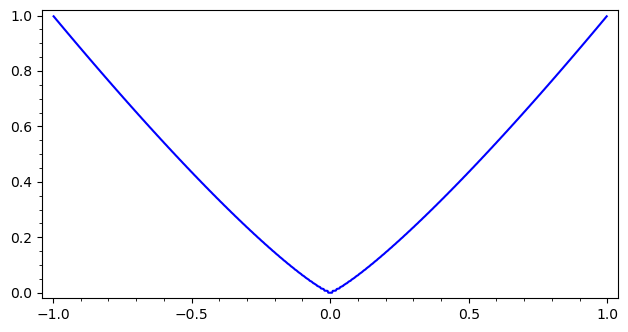

In [8]:
t1,t2 = var("t1,t2")
implicit_plot(t1^6 - t2^5, (t1,-1,1), (t2,0,1))

With this spectral curve, we can see that $(\zeta_6^i, 1)$ with $i=0,\ldots,5$ and $(1, \zeta_5^j)$ for $j=0,\ldots4$ are different points of the curve (getting a total of 10 different points)

###### **Spacial curve case**

In [9]:
L5 = A3[9][1][0]
P6 = A3[9][1][1]
P8 = A3[9][1][3](c_6=0)
fR = L5.parent().change_ring(B.fraction_field())
L5, P6, P8 = fR(L5), fR(P6), fR(P8)

In [10]:
L5_l, P6_m, P8_n = spectral_operators(L5, P6, P8)

In [55]:
p1 = L5_l.sylvester_resultant(P6_m); p1

(lambda_^6 - mu^5)

In [56]:
p2 = L5_l.sylvester_resultant(P8_n); p2

(lambda_^8 - nu^5)

In [57]:
p3 = P6_m.sylvester_resultant(P8_n); p3

(mu^8 - 2*mu^4*nu^3 + nu^6)

In [58]:
## Converting equations to algebraic
p1 = p1.parent().base().base().wrapped(p1)
p2 = p2.parent().base().base().wrapped(p2)
p3 = p3.parent().base().base().wrapped(p3); print(p3)
p3 = p3.factor()[0][0]
I = ideal(p1,p2,p3); I

mu^8 - 2*mu^4*nu^3 + nu^6


Ideal (lambda_^6 - mu^5, lambda_^8 - nu^5, -mu^4 + nu^3) of Multivariate Polynomial Ring in x, lambda_, mu, nu over Rational Field

In [59]:
I.groebner_basis()

[lambda_^4*nu^5 - mu^2*nu^6, mu^3*nu^5 - lambda_^2*nu^6, lambda_^6 - mu*nu^3, lambda_^2*mu*nu^3 - nu^5, mu^4 - nu^3]

###### **All possible generators case**

In [67]:
L5 = A5[5][1][0]
P6 = A5[5][1][1]
P7 = A5[5][1][2]
P8 = A5[5][1][3]
P9 = A5[5][1][4]

In [73]:
L5_l, P6_m, P7_n, P8_p, P9_z = spectral_operators(L5, P6, P7, P8, P9)

In [104]:
## We compute the equations from L, P_i and convert to algebraic setting
equs = [L5_l.sylvester_resultant(p) for p in [P6_m, P7_n, P8_p, P9_z]]
fR = equs[0].parent().base().base().wrapped
equs = [fR(p) for p in equs]
used_vars = list(set(sum((p.variables() for p in equs), tuple())))
fR = fR.remove_var(*[v for v in fR.gens() if v not in used_vars])
equs = [fR(p) for p in equs]
for i,p in enumerate(equs):
    print(i, "->", p)

0 -> lambda_^6 - mu^5
1 -> -c_6^5*lambda_^6 - 5*c_6^3*lambda_^5*nu - lambda_^7 - 5*c_6*lambda_^4*nu^2 + nu^5
2 -> c_7^5*lambda_^7 + c_6^5*lambda_^6 - 5*c_6*c_7^3*lambda_^7 + 5*c_6^2*c_7*lambda_^7 + 5*c_6^3*c_7*lambda_^5*psi - 5*c_7^2*lambda_^6*psi + 5*c_6*c_7^2*lambda_^4*psi^2 + lambda_^8 + 5*c_6*lambda_^6*psi + 5*c_6^2*lambda_^4*psi^2 + 5*c_7*lambda_^3*psi^3 - psi^5
3 -> -c_8^5*lambda_^8 - c_7^5*lambda_^7 + 5*c_6*c_7^3*c_8*lambda_^7 - 5*c_6^2*c_7*c_8^2*lambda_^7 + 5*c_7*c_8^3*lambda_^8 - c_6^5*lambda_^6 - 5*c_6^2*c_7^2*lambda_^7 + 5*c_6^3*c_8*lambda_^7 - 5*c_7^2*c_8*lambda_^8 - 5*c_6*c_8^2*lambda_^8 + 5*c_7^2*c_8^2*lambda_^6*zeta - 5*c_6*c_8^3*lambda_^6*zeta + 5*c_6*c_7*lambda_^8 - 5*c_6^3*c_7*lambda_^5*zeta - 5*c_7^3*lambda_^6*zeta - 5*c_6*c_7*c_8*lambda_^6*zeta - lambda_^9 + 5*c_6^2*lambda_^6*zeta - 5*c_8*lambda_^7*zeta - 5*c_6*c_7^2*lambda_^4*zeta^2 - 5*c_6^2*c_8*lambda_^4*zeta^2 - 5*c_8^2*lambda_^5*zeta^2 - 5*c_7*lambda_^5*zeta^2 - 5*c_7*c_8*lambda_^3*zeta^3 - 5*c_6*lambda_^3*zeta

In [92]:
fR.remove_var?

Docstring:     
   Remove a variable or sequence of variables from "self".

   If "order" is not specified, then the subring inherits the term
   order of the original ring, if possible.

   EXAMPLES:

      sage: P.<x,y,z,w> = PolynomialRing(ZZ)
      sage: P.remove_var(z)
      Multivariate Polynomial Ring in x, y, w over Integer Ring
      sage: P.remove_var(z, x)
      Multivariate Polynomial Ring in y, w over Integer Ring
      sage: P.remove_var(y, z, x)
      Univariate Polynomial Ring in w over Integer Ring

   Removing all variables results in the base ring:

      sage: P.remove_var(y, z, x, w)
      Integer Ring

   If possible, the term order is kept:

      sage: R.<x,y,z,w> = PolynomialRing(ZZ, order='deglex')
      sage: R.remove_var(y).term_order()
      Degree lexicographic term order

      sage: R.<x,y,z,w> = PolynomialRing(ZZ, order='lex')
      sage: R.remove_var(y).term_order()
      Lexicographic term order

   Be careful with block orders when removing variables